# **1. Data Gathering**

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("../data/raw/smartphones - smartphones.csv")

In [7]:
data.sample(6)

model    price  rating  \
933  Tecno Camon 20 Premier  ₹20,999    79.0   
524                Vivo Y01   ₹7,999    61.0   
810       Xiaomi Redmi K60i  ₹28,999    85.0   
546             Vivo Y55 5G  ₹20,990    77.0   
744                itel S16   ₹5,990     NaN   
857             LG Folder 2  ₹11,999     NaN   

                                                   sim  \
933            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
524                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
810  Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, IR B...   
546            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
744                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
857                          Single Sim, 3G, 4G, Wi-Fi   

                                           processor  \
933  Dimensity  700 5G, Octa Core, 2.2 GHz Processor   
524          Helio P35, Octa Core, 2.3 GHz Processor   
810    Dimensity  8200, Octa Core, 3.1 GHz Processor   
546   Dimensity 700 5G, Octa Core, 2.2 GHz Processor   
744     Unisoc SC7731E, Quad Core, 1.3 GHz Processor   
857                           1 GB RAM, 8 GB inbuilt   

                          ram                                   battery  \
933  6 GB RAM, 128 GB inbuilt   5000 mAh Battery with 33W Fast Charging   
524   2 GB RAM, 32 GB inbuilt                          5000 mAh Battery   
810  8 GB RAM, 128 GB inbuilt  5080 mAh Battery with 120W Fast Charging   
546  4 GB RAM, 128 GB inbuilt   5000 mAh Battery with 18W Fast Charging   
744   1 GB RAM, 16 GB inbuilt                          4000 mAh Battery   
857          1470 mAh Battery          2.8 inches, 240 x 320 px Display   

                                               display  \
933  6.83 inches, 1080 x 2460 px, 120 Hz Display wi...   
524  6.51 inches, 720 x 1600 px Display with Water ...   
810  6.67 inches, 1080 x 2460 px, 120 Hz Display wi...   
546  6.58 inches, 1080 x 2408 px Display with Water...   
744  6.5 inches, 1600 x 720 px Display with Water D...   
857                                   2 MP Rear Camera   

                                                camera  \
933  50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
524                      8 MP Rear & 5 MP Front Camera   
810  50 MP + 13 MP + 2 MP Triple Rear & 32 MP Front...   
546  50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...   
744  8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...   
857                              Memory Card Supported   

                                  card           os  
933                        Android v13    Bluetooth  
524   Memory Card Supported, upto 1 TB  Android v11  
810                        Android v13    Bluetooth  
546              Memory Card Supported  Android v11  
744  Memory Card Supported, upto 32 GB  Android v10  
857                          Bluetooth          NaN

## **Meta Data**

This data is about the smartphones. It contains the features of smart phones that also make some phones even costlear. The features contain in the mobile phone such as:-

* model - tells you the model name of the device and name of the brand.
* price - tells you the price of that device.
* rating - this tells you the rating of that device.
* sim - this contain that tells about the availability if 5G, doul sim slots and whether it has NFC.
* processor - this contains the processor name, processor core and speed of the processor.
* ram - it contain the data of ram size and inbuilt data.
* battery - tells you about the size of the battery and whether the fast charging is available or not.
* display - this contain the size of the display, refresh rate of the display and even the quality of the display.
* camera - it contain the data of frun and rear cameras with their camera.
* card - tells you whether the memory card is supported or not and if yes then how much.
* os - it tells you the os of that devices.

---



# **2. Data Ascessing**


> ## **Dirty Data**

* model - some brand names are written differently like POCO/Poco , Oppo/OPPO and other brands. `consistency`
* price - the price has rupee sign '₹10,00,000' in frunt of the price of the device which is unnecessary. `validity`
* rating - there some mobile phones that has null values. `completeness`
* processor - there are some processor that does not have names and there are some that contains error values or you can say garbage values that is not needed. `validity`
* memory - it contains some error values. `validity`
* battry - it also has some error values. `validity`
* display - it contain some error values and missing values. `validity & completeness`

* card - there are some unrequired values and missing values. `validity & completeness`
* os - some of the values that os feature contains is noisey values, there are some unnecessary special characters available, missing values. `validity & completeness`
* camera - it contains some missing values. `completeness`

`NOTE : ` There are some noisey values where the values of each columns get interchanged.


> ## **Messy Data**

* sim - this contains data about the availability if 5G, doul sim slots and whether it has NFC in one column, there should be diferent columns for each one.
* ram - this contain the ram and base memory that means that these values should be seperate columns.
* processor - it can be split into processor name, cores, cpu speed.
* battery - this also contain how much battry is there and whether the fast charging is available or not.

* display - this contain the size of the display, refresh rate of the display and even the quality of the display and this data should be in seperate columns.
* camera - the values should be seperate in different columns.
* card - it can be split into supported or not and how much is supported.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [11]:
data.describe()

rating
count  879.000000
mean    78.258248
std      7.402854
min     60.000000
25%     74.000000
50%     80.000000
75%     84.000000
max     89.000000

In [13]:
data['processor'].str.split().str.get(0).value_counts()

processor
Snapdragon    411
Helio         200
Dimensity     177
Exynos         49
Bionic         39
Unisoc         27
Tiger          24
Octa           14
No             13
Google          9
Kirin           7
Quad            6
Qualcomm        5
A13             5
Spreadtrum      4
1               3
4               3
SC9863A,        2
Helio,          2
32              2
1.77            2
52              1
48              1
256             1
Single          1
Samsung         1
(28             1
SC6531E,        1
Dual            1
2000            1
800             1
1450            1
Fusion          1
Sanpdragon      1
Unisoc,         1
Apple           1
8               1
Name: count, dtype: int64

In [15]:
df = data.copy()

In [17]:
df.sample(5)

model    price  rating  \
778         Tecno Spark Go 2022   ₹6,249    61.0   
834      Realme Narzo 50A Prime  ₹11,399    73.0   
883  Vivo Y15C (3GB RAM + 64GB)  ₹10,490    67.0   
408          OPPO Reno 6 Pro 5G  ₹36,760    87.0   
928        Apple iPhone 15 Plus  ₹84,990    75.0   

                                               sim  \
778                 Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
834                 Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
883                 Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
408        Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
928  Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC   

                                      processor                        ram  \
778                Octa Core, 2.2 GHz Processor    2 GB RAM, 32 GB inbuilt   
834   Tiger T612, Octa Core, 1.82 GHz Processor    4 GB RAM, 64 GB inbuilt   
883     Helio P35, Octa Core, 2.3 GHz Processor    3 GB RAM, 64 GB inbuilt   
408  Dimensity 1200, Octa Core, 3 GHz Processor  12 GB RAM, 256 GB inbuilt   
928             Bionic A16, Hexa Core Processor   8 GB RAM, 128 GB inbuilt   

                                     battery  \
778                         5000 mAh Battery   
834  5000 mAh Battery with 18W Fast Charging   
883                         5000 mAh Battery   
408  4500 mAh Battery with 65W Fast Charging   
928      4532 mAh Battery with Fast Charging   

                                               display  \
778  6.51 inches, 720 x 1600 px Display with Water ...   
834  6.6 inches, 1080 x 2408 px Display with Water ...   
883  6.51 inches, 720 x 1600 px Display with Water ...   
408  6.55 inches, 1080 x 2400 px, 90 Hz Display wit...   
928  6.71 inches, 1284 x 2778 px, 120 Hz Display wi...   

                                                camera  \
778         13 MP + 2 MP Dual Rear & 8 MP Front Camera   
834  50 MP + 3 MP + 2 MP Triple Rear & 8 MP Front C...   
883         13 MP + 2 MP Dual Rear & 8 MP Front Camera   
408               64 MP Quad Rear & 32 MP Front Camera   
928       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                                   card           os  
778  Memory Card Supported, upto 256 GB  Android v11  
834    Memory Card Supported, upto 1 TB  Android v11  
883    Memory Card Supported, upto 1 TB  Android v12  
408           Memory Card Not Supported  Android v11  
928           Memory Card Not Supported      iOS v16

In [19]:
# price

df['price'] = df['price'].str.split('₹').str.get(1).str.replace(',','').astype('int')

In [21]:
df = df.reset_index()

In [23]:
df['index'] = df['index'] + 2

In [25]:
df.head()

index                      model  price  rating  \
0      2              OnePlus 11 5G  54999    89.0   
1      3  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4      Samsung Galaxy A14 5G  16499    75.0   
3      5       Motorola Moto G62 5G  14999    81.0   
4      6         Realme 10 Pro Plus  24999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

In [27]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [29]:
df[df['index'] == 642]

index           model  price  rating       sim               processor  \
640    642  Nokia 105 Plus   1299     NaN  Dual Sim  4 MB RAM, 4 MB inbuilt   

                 ram                            battery         display  \
640  800 mAh Battery  1.77 inches, 128 x 160 px Display  No Rear Camera   

                                camera       card   os  
640  Memory Card Supported, upto 32 GB  Bluetooth  NaN

In [31]:
df[df['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

index                              model   price  rating  \
98      100                     Vivo X Fold 5G  106990     NaN   
111     113                    Apple iPhone 12   51999    74.0   
149     151               Apple iPhone 12 Mini   40999    74.0   
155     157                    Nokia 2780 Flip    4990     NaN   
159     161                    Oppo Find N2 5G   94990     NaN   
...     ...                                ...     ...     ...   
954     956  Vivo X Fold 5G (12GB RAM + 512GB)  118990     NaN   
988     990                Nokia 5310 Dual Sim    3399     NaN   
993     995                      Huawei Mate X  169000     NaN   
1000   1002                    XTouch F40 Flip    1999     NaN   
1014   1016                      Vivo X Fold 2  119990     NaN   

                                                    sim  \
98              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
111             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
155                             Dual Sim, 3G, 4G, Wi-Fi   
159             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
...                                                 ...   
954             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
988                                            Dual Sim   
993   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1000                                           Dual Sim   
1014            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                             processor  \
98       Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
111           Bionic A14, Hexa Core, 3.1 GHz Processor   
149           Bionic A14, Hexa Core, 3.1 GHz Processor   
155     Snapdragon QM215, Quad Core, 1.3 GHz Processor   
159   Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
...                                                ...   
954      Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
988                            8 MB RAM, 16 MB inbuilt   
993          Kirin  990, Octa Core, 2.86 GHz Processor   
1000                                             No 3G   
1014   Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   

                            ram  \
98    12 GB RAM, 256 GB inbuilt   
111     4 GB RAM, 64 GB inbuilt   
149     4 GB RAM, 64 GB inbuilt   
155    4 GB RAM, 512 MB inbuilt   
159   12 GB RAM, 256 GB inbuilt   
...                         ...   
954   12 GB RAM, 512 GB inbuilt   
988            1200 mAh Battery   
993    8 GB RAM, 512 GB inbuilt   
1000                    No Wifi   
1014  12 GB RAM, 256 GB inbuilt   

                                                battery  \
98              4600 mAh Battery with 66W Fast Charging   
111   6.1 inches, 1170 x 2532 px Display with Large ...   
149                  5.4 inches, 1080 x 2340 px Display   
155                                    1450 mAh Battery   
159             4520 mAh Battery with 67W Fast Charging   
...                                                 ...   
954             4600 mAh Battery with 66W Fast Charging   
988                    2.4 inches, 240 x 320 px Display   
993             4500 mAh Battery with 55W Fast Charging   
1000                           32 MB RAM, 32 MB inbuilt   
1014            4800 mAh Battery with 66W Fast Charging   

                                                display  \
98          8.03 inches, 1916 x 2160 px, 120 Hz Display   
111        12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149        12 MP + 12 MP Dual Rear & 12 MP Front Camera   
155                    2.7 inches, 240 x 320 px Display   
159   7.1 inches, 1792 x 1920 px, 120 Hz Display wit...   
...                                                 ...   
954         8.03 inches, 1916 x 2160 px, 120 Hz Display   
988                                  0.3 MP Rear Camera   
993                    8 inches, 2200 x 2480 px Display   
1000                                    800 mAh Battery   
1014        8.03 inches, 191

In [33]:
df[df['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

index                   model  price  rating  \
640     642          Nokia 105 Plus   1299     NaN   
645     647         Nokia 2760 Flip   5490     NaN   
647     649       Motorola Moto A10   1339     NaN   
657     659           Zanco Tiny T1   2799     NaN   
665     667            itel it2163S    958     NaN   
748     750            Nokia 400 4G   3290     NaN   
757     759            Karbonn KU3i    995     NaN   
817     819            itel Magic X   2239     NaN   
882     884  Nokia 5710 XpressAudio   4799     NaN   
925     927           Nokia 3310 4G   3999     NaN   
927     929      Samsung Guru E1200   1685     NaN   
930     932        iKall K88 Pro 4G   2099     NaN   
1000   1002         XTouch F40 Flip   1999     NaN   

                                 sim                   processor  \
640                         Dual Sim      4 MB RAM, 4 MB inbuilt   
645          Dual Sim, 3G, 4G, Wi-Fi            1450 mAh Battery   
647                         Dual Sim      4 MB RAM, 4 MB inbuilt   
657                       Single Sim    32 MB RAM, 32 MB inbuilt   
665                         Dual Sim      4 MB RAM, 4 MB inbuilt   
748       Dual Sim, 4G, VoLTE, Wi-Fi            2000 mAh Battery   
757                         Dual Sim    52 MB RAM, 32 MB inbuilt   
817   Dual Sim, 3G, 4G, VoLTE, Wi-Fi                       No 3G   
882                 Dual Sim, 3G, 4G                     No Wifi   
925   Dual Sim, 3G, 4G, VoLTE, Wi-Fi  256 MB RAM, 512 MB inbuilt   
927                       Single Sim                     No Wifi   
930          Dual Sim, 3G, 4G, VoLTE   48 MB RAM, 128 MB inbuilt   
1000                        Dual Sim                       No 3G   

                                   ram                            battery  \
640                    800 mAh Battery  1.77 inches, 128 x 160 px Display   
645   3.6 inches, 240 x 320 px Display      5 MP Rear & 5 MP Front Camera   
647                   1750 mAh Battery   1.8 inches, 160 x 128 px Display   
657                    200 mAh Battery    0.49 inches, 64 x 32 px Display   
665                   1200 mAh Battery   1.8 inches, 160 x 128 px Display   
748   2.4 inches, 240 x 320 px Display  0.3 MP Rear & 0.3 MP Front Camera   
757                   1000 mAh Battery   1.8 inches, 128 x 160 px Display   
817                               T117          48 MB RAM, 128 MB inbuilt   
882                        Unisoc T107          48 MB RAM, 128 MB inbuilt   
925                   1200 mAh Battery   2.4 inches, 240 x 320 px Display   
927                    800 mAh Battery   1.5 inches, 128 x 128 px Display   
930                   1800 mAh Battery   2.4 inches, 240 x 360 px Display   
1000                           No Wifi           32 MB RAM, 32 MB inbuilt   

                                display                              camera  \
640                      No Rear Camera   Memory Card Supported, upto 32 GB   
645   Memory Card Supported, upto 32 GB                          Kaios v3.0   
647                      No Rear Camera   Memory Card Supported, upto 32 GB   
657                      No Rear Camera                         No FM Radio   
665                      No Rear Camera   Memory Card Supported, upto 32 GB   
748   Memory Card Supported, upto 64 GB                           Bluetooth   
757                      No Rear Camera   Memory Card Supported, upto 16 GB   
817                    1200 mAh Battery    2.4 inches, 240 x 320 px Display   
882                    1450 mAh Battery    2.4 inches, 240 x 320 px Display   
925                    2 MP Rear Camera   Memory Card Supported, upto 32 GB   
927                      No Rear Camera                         No FM Radio   
930                  0.3 MP Rear Camera  Memory Card Supported, upto 128 GB   
1000                    800 mAh Battery   1.77 inches, 240 x 320 px Display   

                    card                                 os  
640            Bluetooth                        

In [35]:
df = df[df['price'] > 3400]

In [37]:
df[df['index'].isin(processor_rows)]

index                   model  price  rating  \
645    647         Nokia 2760 Flip   5490     NaN   
857    859             LG Folder 2  11999     NaN   
882    884  Nokia 5710 XpressAudio   4799     NaN   
925    927           Nokia 3310 4G   3999     NaN   

                                sim                   processor  \
645         Dual Sim, 3G, 4G, Wi-Fi            1450 mAh Battery   
857       Single Sim, 3G, 4G, Wi-Fi      1 GB RAM, 8 GB inbuilt   
882                Dual Sim, 3G, 4G                     No Wifi   
925  Dual Sim, 3G, 4G, VoLTE, Wi-Fi  256 MB RAM, 512 MB inbuilt   

                                  ram                           battery  \
645  3.6 inches, 240 x 320 px Display     5 MP Rear & 5 MP Front Camera   
857                  1470 mAh Battery  2.8 inches, 240 x 320 px Display   
882                       Unisoc T107         48 MB RAM, 128 MB inbuilt   
925                  1200 mAh Battery  2.4 inches, 240 x 320 px Display   

                               display                             camera  \
645  Memory Card Supported, upto 32 GB                         Kaios v3.0   
857                   2 MP Rear Camera              Memory Card Supported   
882                   1450 mAh Battery   2.4 inches, 240 x 320 px Display   
925                   2 MP Rear Camera  Memory Card Supported, upto 32 GB   

                   card                                 os  
645           Bluetooth                                NaN  
857           Bluetooth                                NaN  
882  0.3 MP Rear Camera  Memory Card Supported, upto 32 GB  
925           Bluetooth                            Browser

In [39]:
df.drop([645,857,882,925], inplace=True)

In [41]:
df[df['index'].isin(ram_rows)]

index                             model   price  rating  \
439    441            Apple iPhone SE 3 2022   43900     NaN   
483    485  Huawei Mate 50 RS Porsche Design  239999    81.0   
582    584                     Nokia 8210 4G    3749     NaN   

                                                 sim  \
439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   
582                                 Dual Sim, 3G, 4G   

                                            processor             ram  \
439        Bionic  A15, Hexa Core, 3.22 GHz Processor   64 GB inbuilt   
483  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor  512 GB inbuilt   
582                                           No Wifi     Unisoc T107   

                                     battery  \
439        4.7 inches, 750 x 1334 px Display   
483  4700 mAh Battery with 66W Fast Charging   
582                48 MB RAM, 128 MB inbuilt   

                                         display  \
439               12 MP Rear & 7 MP Front Camera   
483  6.74 inches, 1212 x 2616 px, 120 Hz Display   
582                             1450 mAh Battery   

                                                camera  \
439                          Memory Card Not Supported   
483  50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...   
582                   2.8 inches, 240 x 320 px Display   

                                  card                                 os  
439                            iOS v15                        No FM Radio  
483  Memory Card (Hybrid), upto 256 GB                   Hongmeng OS v3.0  
582                 0.3 MP Rear Camera  Memory Card Supported, upto 32 GB

In [43]:
df.drop(582, inplace=True)

In [45]:
df[df['index'].isin(battery_rows)]

index                         model   price  rating  \
111    113               Apple iPhone 12   51999    74.0   
149    151          Apple iPhone 12 Mini   40999    74.0   
307    309       Apple iPhone 12 (128GB)   55999    75.0   
363    365  Apple iPhone 12 Mini (128GB)   45999    75.0   
376    378               Nokia 2660 Flip    4649     NaN   
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
754    756    Apple iPod Touch (7th Gen)   18900     NaN   
762    764             Apple iPhone SE 4   49990    60.0   
853    855   Apple iPhone 12 Pro (256GB)  119900    80.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
363  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
376                         Dual Sim, 3G, 4G   
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
754                                    Wi-Fi   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
853  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor  \
111    Bionic A14, Hexa Core, 3.1 GHz Processor   
149    Bionic A14, Hexa Core, 3.1 GHz Processor   
307    Bionic A14, Hexa Core, 3.1 GHz Processor   
363    Bionic A14, Hexa Core, 3.1 GHz Processor   
376                                     No Wifi   
439  Bionic  A15, Hexa Core, 3.22 GHz Processor   
448                                 Bionic  A16   
628    Bionic A14, Hexa Core, 3.1 GHz Processor   
754                               32 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor   
853    Bionic A14, Hexa Core, 3.1 GHz Processor   
913    Bionic A14, Hexa Core, 3.1 GHz Processor   
914    Bionic A14, Hexa Core, 3.1 GHz Processor   

                                 ram  \
111          4 GB RAM, 64 GB inbuilt   
149          4 GB RAM, 64 GB inbuilt   
307         4 GB RAM, 128 GB inbuilt   
363         4 GB RAM, 128 GB inbuilt   
376                      Unisoc T107   
439                    64 GB inbuilt   
448         8 GB RAM, 128 GB inbuilt   
628         6 GB RAM, 512 GB inbuilt   
754  4 inches, 640 x 1136 px Display   
762                    64 GB inbuilt   
853         6 GB RAM, 256 GB inbuilt   
913         4 GB RAM, 256 GB inbuilt   
914         4 GB RAM, 256 GB inbuilt   

                                               battery  \
111  6.1 inches, 1170 x 2532 px Display with Large ...   
149                 5.4 inches, 1080 x 2340 px Display   
307  6.1 inches, 1170 x 2532 px Display with Large ...   
363                 5.4 inches, 1080 x 2340 px Display   
376                          48 MB RAM, 128 MB inbuilt   
439                  4.7 inches, 750 x 1334 px Display   
448  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628  6.1 inches, 1170 x 2532 px Display with Large ...   
754                    8 MP Rear & 1.2 MP Front Camera   
762                  6.1 inches, 750 x 1580 px Display   
853  6.1 inches, 1170 x 2532 px Display with Large ...   
913                 5.4 inches, 1080 x 2340 px Display   
914  6.1 inches, 1170 x 2532 px Display with Large ...   

                                               display  \
111       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
307       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
363       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
376                                   1450 mAh Battery   
439                     12 MP Rear & 7 MP Front Camera

In [47]:
df.drop([376, 754], inplace=True)

In [49]:
temp_df = df[df['index'].isin(battery_rows)]

In [51]:
x = temp_df.iloc[:,7:].shift(1,axis=1).values

In [53]:
df.loc[temp_df.index,temp_df.columns[7:]] = x

In [55]:
df[df['index'].isin(battery_rows)]

index                         model   price  rating  \
111    113               Apple iPhone 12   51999    74.0   
149    151          Apple iPhone 12 Mini   40999    74.0   
307    309       Apple iPhone 12 (128GB)   55999    75.0   
363    365  Apple iPhone 12 Mini (128GB)   45999    75.0   
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
762    764             Apple iPhone SE 4   49990    60.0   
853    855   Apple iPhone 12 Pro (256GB)  119900    80.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
363  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
853  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor                       ram  \
111    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
149    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
307    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
363    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
439  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
448                                 Bionic  A16  8 GB RAM, 128 GB inbuilt   
628    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 512 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
853    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 256 GB inbuilt   
913    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   
914    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   

    battery                                            display  \
111    None  6.1 inches, 1170 x 2532 px Display with Large ...   
149    None                 5.4 inches, 1080 x 2340 px Display   
307    None  6.1 inches, 1170 x 2532 px Display with Large ...   
363    None                 5.4 inches, 1080 x 2340 px Display   
439    None                  4.7 inches, 750 x 1334 px Display   
448    None  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628    None  6.1 inches, 1170 x 2532 px Display with Large ...   
762    None                  6.1 inches, 750 x 1580 px Display   
853    None  6.1 inches, 1170 x 2532 px Display with Large ...   
913    None                 5.4 inches, 1080 x 2340 px Display   
914    None  6.1 inches, 1170 x 2532 px Display with Large ...   

                                                camera  \
111       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
307       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
363       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
439                     12 MP Rear & 7 MP Front Camera   
448  50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
628  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
762                  12 MP Rear & 10.8 MP Front Camera   
853  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
913       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
914       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                          card         os  
111  Memory Card Not Supported    iOS v14  
149  Memory Card Not Supported    iOS v14  
307  Memory Card Not Supported    iOS v14  
363  Memory Card Not Supported    iOS v14  
439  Memory Card Not Supported    iOS v15  
448  Memory Card Not Support

In [57]:
df[df['index'].isin(display_rows)]

index                         model   price  rating  \
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
762    764             Apple iPhone SE 4   49990    60.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor                       ram  \
439  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
448                                 Bionic  A16  8 GB RAM, 128 GB inbuilt   
628    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 512 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
913    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   
914    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   

    battery                                            display  \
439    None                  4.7 inches, 750 x 1334 px Display   
448    None  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628    None  6.1 inches, 1170 x 2532 px Display with Large ...   
762    None                  6.1 inches, 750 x 1580 px Display   
913    None                 5.4 inches, 1080 x 2340 px Display   
914    None  6.1 inches, 1170 x 2532 px Display with Large ...   

                                                camera  \
439                     12 MP Rear & 7 MP Front Camera   
448  50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
628  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
762                  12 MP Rear & 10.8 MP Front Camera   
913       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
914       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                          card         os  
439  Memory Card Not Supported    iOS v15  
448  Memory Card Not Supported    iOS v15  
628  Memory Card Not Supported  iOS v14.0  
762  Memory Card Not Supported    iOS v16  
913  Memory Card Not Supported    iOS v14  
914  Memory Card Not Supported    iOS v14

In [59]:
len(display_rows)

27

In [61]:
df[df['index'].isin(camera_rows)].head()

index                 model   price  rating  \
98     100        Vivo X Fold 5G  106990     NaN   
111    113       Apple iPhone 12   51999    74.0   
149    151  Apple iPhone 12 Mini   40999    74.0   
155    157       Nokia 2780 Flip    4990     NaN   
159    161       Oppo Find N2 5G   94990     NaN   

                                         sim  \
98   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
155                  Dual Sim, 3G, 4G, Wi-Fi   
159  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                            processor  \
98      Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
111          Bionic A14, Hexa Core, 3.1 GHz Processor   
149          Bionic A14, Hexa Core, 3.1 GHz Processor   
155    Snapdragon QM215, Quad Core, 1.3 GHz Processor   
159  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   

                           ram                                  battery  \
98   12 GB RAM, 256 GB inbuilt  4600 mAh Battery with 66W Fast Charging   
111    4 GB RAM, 64 GB inbuilt                                     None   
149    4 GB RAM, 64 GB inbuilt                                     None   
155   4 GB RAM, 512 MB inbuilt                         1450 mAh Battery   
159  12 GB RAM, 256 GB inbuilt  4520 mAh Battery with 67W Fast Charging   

                                               display  \
98         8.03 inches, 1916 x 2160 px, 120 Hz Display   
111  6.1 inches, 1170 x 2532 px Display with Large ...   
149                 5.4 inches, 1080 x 2340 px Display   
155                   2.7 inches, 240 x 320 px Display   
159  7.1 inches, 1792 x 1920 px, 120 Hz Display wit...   

                                           camera  \
98                               Foldable Display   
111  12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149  12 MP + 12 MP Dual Rear & 12 MP Front Camera   
155                                  Dual Display   
159                Foldable Display, Dual Display   

                                                  card  \
98                50 MP Quad Rear & 16 MP Front Camera   
111                          Memory Card Not Supported   
149                          Memory Card Not Supported   
155                                   5 MP Rear Camera   
159  50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...   

                                    os  
98                         Android v12  
111                            iOS v14  
149                            iOS v14  
155  Memory Card Supported, upto 32 GB  
159          Memory Card Not Supported

In [63]:
df.drop([155,271],inplace=True)

In [65]:
temp_df = df[df['index'].isin(camera_rows)]

In [67]:
temp_df = temp_df[~temp_df['camera'].str.contains('MP')]

In [69]:
df.loc[temp_df.index, 'camera'] = temp_df['card'].values

In [71]:
print(df['card'].value_counts())

card
Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Android v10                                                             11
Memory Card (Hybrid), upto 512 GB                                       11
Memory Card Supporte

In [73]:
temp_df = df[df['card'].str.contains('MP')]

In [75]:
df.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [77]:
print(df['card'].value_counts())

card
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v1

In [79]:
pd.set_option('display.max_rows', None)

In [81]:
temp_df = df[~df['card'].str.contains('Memory Card')]

In [83]:
df.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [85]:
print(df['card'].value_counts())

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64


In [87]:
df.loc[temp_df.index, 'os'] = temp_df['card'].values

In [89]:
print(df['os'].value_counts())

os
Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                  

In [91]:
temp_df = df[df['os'] == 'Bluetooth']

In [93]:
df.loc[temp_df.index,'os'] = np.nan

In [95]:
df.sample(5)

index                                    model  price  rating  \
561    563                              Poco F5 Pro  29999    84.0   
738    740                           Nokia C01 Plus   5249     NaN   
12      14              Xiaomi Redmi Note 12 Pro 5G  24762    79.0   
291    293                       Samsung Galaxy M13  12999    75.0   
295    297  Samsung Galaxy A23 5G (8GB RAM + 128GB)  24999    81.0   

                                                   sim  \
561  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
738                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
12      Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster   
291                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
295                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                             processor  \
561  Snapdragon  8+ Gen1, Octa Core, 3.2 GHz Processor   
738      Unisoc  SC9863A, Octa Core, 1.6 GHz Processor   
12        Dimensity 1080, Octa Core, 2.6 GHz Processor   
291            Exynos  850, Octa Core, 2 GHz Processor   
295       Snapdragon 695, Octa Core, 2.2 GHz Processor   

                          ram                                  battery  \
561  8 GB RAM, 128 GB inbuilt  5500 mAh Battery with 67W Fast Charging   
738   2 GB RAM, 16 GB inbuilt                         3000 mAh Battery   
12   6 GB RAM, 128 GB inbuilt  5000 mAh Battery with 67W Fast Charging   
291  6 GB RAM, 128 GB inbuilt  6000 mAh Battery with 15W Fast Charging   
295  8 GB RAM, 128 GB inbuilt  5000 mAh Battery with 25W Fast Charging   

                                               display  \
561  6.67 inches, 1440 x 3200 px, 120 Hz Display wi...   
738                 5.45 inches, 720 x 1440 px Display   
12   6.67 inches, 1080 x 2400 px, 120 Hz Display wi...   
291  6.6 inches, 1080 x 2400 px Display with Water ...   
295  6.6 inches, 1080 x 2408 px, 120 Hz Display wit...   

                                                camera  \
561  64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
738                      5 MP Rear & 5 MP Front Camera   
12   50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
291  50 MP + 5 MP + 2 MP Triple Rear & 8 MP Front C...   
295                50 MP Quad Rear & 8 MP Front Camera   

                                   card           os  
561           Memory Card Not Supported  Android v13  
738  Memory Card Supported, upto 256 GB  Android v11  
12            Memory Card Not Supported  Android v12  
291    Memory Card Supported, upto 1 TB  Android v12  
295    Memory Card Supported, upto 1 TB  Android v12

In [97]:
print(df['display'].value_counts())

display
6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          54
6.5 inches, 720 x 1600 px Display with Water Drop Notch              36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole           25
6.52 inches, 720 x 1600 px Display with Water Drop Notch             23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            22
6.51 inches, 720 x 1600 px Display with Water Drop Notch             21
6.43 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole           19
6.43 inches, 1080 x 2400 px Display with Punch Hole                  16
6.62 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          15
6.53 inches, 720 x 1600 px Display with Water Drop Notch             14
6.4 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            14
6.55 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          11
6.7 inches, 1440 x 3216 px, 120 Hz Display with Punch Hole           10
6.58 inches, 1080 x 2408 px, 120 Hz Display with Water D

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int32  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         981 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 128.2+ KB


# **2. Data Ascessing - 2**


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int32  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         981 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 128.2+ KB


In [104]:
df.head(2)

index                      model  price  rating  \
0      2              OnePlus 11 5G  54999    89.0   
1      3  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12

In [106]:
brand_name = df['model'].str.split().str.get(0)

In [108]:
df.insert(1,'brand_name',brand_name)

In [110]:
df['brand_name'] = df['brand_name'].str.lower()

In [112]:
df['sim'].str.contains('5G')

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16      False
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32       True
33      False
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44      False
45       True
46      False
47      False
48      False
49       True
50       True
51       True
52       True
53       True
54      False
55       True
56       True
57      False
58       True
59      False
60       True
61       True
62      False
63      False
64       True
65       True
66       True
67       True
68       True
69       True
70      False
71    

In [114]:
has_5g = df['sim'].str.contains('5G')
has_nfc = df['sim'].str.contains('NFC')
has_ir_blaster = df['sim'].str.contains('IR Blaster')

In [116]:
df.insert(6,'has_5g',has_5g)
df.insert(7,'has_nfc',has_nfc)
df.insert(8,'has_ir_blaster',has_ir_blaster)

In [118]:
processor_name = df['processor'].str.split(',').str.get(0)
processor_core = df['processor'].str.split(',').str.get(1)
processor_speed = df['processor'].str.split(',').str.get(2)

In [120]:
df.insert(10,'processor_name',processor_name)
df.insert(11,'processor_core',processor_core)
df.insert(12,'processor_speed',processor_speed)

In [122]:
df['processor_name'] = processor_name
processor_brand = df['processor_name'].str.split().str.get(0)

In [124]:
df.insert(10, 'processor_brand', processor_brand)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            982 non-null    int64  
 1   brand_name       982 non-null    object 
 2   model            982 non-null    object 
 3   price            982 non-null    int32  
 4   rating           879 non-null    float64
 5   sim              982 non-null    object 
 6   has_5g           982 non-null    bool   
 7   has_nfc          982 non-null    bool   
 8   has_ir_blaster   982 non-null    bool   
 9   processor        982 non-null    object 
 10  processor_brand  982 non-null    object 
 11  processor_name   982 non-null    object 
 12  processor_core   966 non-null    object 
 13  processor_speed  928 non-null    object 
 14  ram              982 non-null    object 
 15  battery          971 non-null    object 
 16  display          982 non-null    object 
 17  camera           982

In [128]:
temp_df = df[df['processor_name'].str.contains('Core')][['processor_name', 'processor_core', 'processor_speed']].shift(1, axis=1)

In [130]:
df.loc[temp_df.index, temp_df.columns] = temp_df.values

In [132]:
df.sample(6)

index brand_name                         model  price  rating  \
234    236       oppo                      OPPO A58  18990    76.0   
558    560   motorola            Motorola Moto E32s   7990    65.0   
323    325      apple  Apple iPhone 14 Plus (256GB)  84999    83.0   
39      41       oppo                OPPO Reno 9 5G  28499    83.0   
850    852    samsung            Samsung Galaxy M62  23999    83.0   
886    888    samsung         Samsung Galaxy A92 5G  47990    80.0   

                                         sim  has_5g  has_nfc  has_ir_blaster  \
234       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
558           Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False           False   
323  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
39   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
850      Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False     True           False   
886       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                          processor processor_brand  \
234  Dimensity 700 5G, Octa Core, 2.2 GHz Processor       Dimensity   
558         Helio G37, Octa Core, 1.8 GHz Processor           Helio   
323       Bionic A15, Hexa Core, 3.22 GHz Processor          Bionic   
39    Snapdragon 778G, Octa Core, 2.4 GHz Processor      Snapdragon   
850      Exynos 9825, Octa Core, 2.73 GHz Processor          Exynos   
886      Dimensity 1300, Octa Core, 3 GHz Processor       Dimensity   

       processor_name processor_core      processor_speed  \
234  Dimensity 700 5G      Octa Core    2.2 GHz Processor   
558         Helio G37      Octa Core    1.8 GHz Processor   
323        Bionic A15      Hexa Core   3.22 GHz Processor   
39    Snapdragon 778G      Octa Core    2.4 GHz Processor   
850       Exynos 9825      Octa Core   2.73 GHz Processor   
886    Dimensity 1300      Octa Core      3 GHz Processor   

                          ram                                  battery  \
234  6 GB RAM, 128 GB inbuilt  5000 mAh Battery with 33W Fast Charging   
558   3 GB RAM, 32 GB inbuilt  5000 mAh Battery with 18W Fast Charging   
323  6 GB RAM, 256 GB inbuilt      4325 mAh Battery with Fast Charging   
39   8 GB RAM, 256 GB inbuilt  4500 mAh Battery with 67W Fast Charging   
850  6 GB RAM, 128 GB inbuilt      7000 mAh Battery with Fast Charging   
886  8 GB RAM, 128 GB inbuilt      5000 mAh Battery with Fast Charging   

                                               display  \
234  6.56 inches, 720 x 1612 px, 90 Hz Display with...   
558  6.5 inches, 720 x 1600 px, 90 Hz Display with ...   
323  6.7 inches, 1284 x 2778 px Display with Small ...   
39   6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
850  6.71 inches, 1080 x 2400 px Display with Punch...   
886  6.7 inches, 1080 x 2400 px Display with Punch ...   

                                                camera  \
234         50 MP + 2 MP Dual Rear & 8 MP Front Camera   
558  16 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...   
323       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
39         64 MP + 2 MP Dual Rear & 32 MP Front Camera   
850               64 MP Quad Rear & 32 MP Front Camera   
886  48 MP + 12 MP + 5 MP Triple Rear & 16 MP Front...   

                                 card           os  
234  Memory Card Supported, upto 1 TB  Android v12  
558  Memory Card Supported, upto 1 TB  Android v12  
323         Memory Card Not Supported      iOS v16  
39          Memory Card Not Supported  Android v13  
850  Memory Card Supported, upto 1 TB  Android v11  
886         Memory Card Not Supported  Android v12

In [134]:
print(df.loc[856])

index                                                858
brand_name                                       samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                             False
has_nfc                                            False
has_ir_blaster                                     False
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_brand                                      (28
processor_name                                   (28 nm)
processor_core                                 Quad Core
processor_speed                        1.5 GHz Processor
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP

In [136]:
df['processor_brand'] = df['processor_brand'].str.lower()

In [138]:
df.loc[856, 'processor_name'] = 'Mediatek MT6739'

In [140]:
df.sample(2)

index brand_name                          model  price  rating  \
146    148       iqoo                         iQOO 7  24990    83.0   
360    362     realme  Realme 9 4G (8GB RAM + 128GB)  15999    84.0   

                                         sim  has_5g  has_nfc  has_ir_blaster  \
146  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
360           Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False           False   

                                        processor processor_brand  \
146  Snapdragon 870, Octa Core, 3.2 GHz Processor      snapdragon   
360  Snapdragon 680, Octa Core, 2.4 GHz Processor      snapdragon   

     processor_name processor_core     processor_speed  \
146  Snapdragon 870      Octa Core   3.2 GHz Processor   
360  Snapdragon 680      Octa Core   2.4 GHz Processor   

                          ram                                  battery  \
146  8 GB RAM, 128 GB inbuilt  4400 mAh Battery with 66W Fast Charging   
360  8 GB RAM, 128 GB inbuilt  5000 mAh Battery with 33W Fast Charging   

                                               display  \
146  6.62 inches, 1080 x 2400 px, 120 Hz Display wi...   
360  6.4 inches, 1080 x 2400 px, 90 Hz Display with...   

                                                camera  \
146  48 MP + 13 MP + 2 MP Triple Rear & 16 MP Front...   
360  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                                   card           os  
146           Memory Card Not Supported  Android v11  
360  Memory Card Supported, upto 256 GB  Android v12

In [142]:
df['processor_core'].value_counts()

processor_core
 Octa Core              866
 Hexa Core               31
 Quad Core               31
 Octa Core Processor     19
Octa Core Processor       9
 Hexa Core Processor      8
Quad Core                 6
Octa Core                 5
Name: count, dtype: int64

In [144]:
'''
df['processor_core'].replace('Octa Core Processor', 'Octa Core', inplace=True)
df['processor_core'].replace('Hexa Core Processor', 'Hexa Core', inplace=True)
'''

# or

# more effective one
df['processor_core'] = df['processor_core'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

In [146]:
df['processor_core'] = df['processor_core'].str.strip()

In [148]:
df['processor_core'].replace('Quad Core', 'Quad Core', inplace=True)

C:\Users\Nihal\AppData\Local\Temp\ipykernel_20612\3295247264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processor_core'].replace('Quad Core', 'Quad Core', inplace=True)


In [150]:
df['processor_core'].value_counts()

processor_core
Octa Core    899
Hexa Core     39
Quad Core     37
Name: count, dtype: int64

In [152]:
df['processor_speed']  = df['processor_speed'].str.split().str.get(0).str.replace('\u2009', ' ').str.split(' ').str.get(0).astype('float')

In [154]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor processor_brand  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor      snapdragon   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor      snapdragon   

      processor_name processor_core  processor_speed  \
0  Snapdragon 8 Gen2      Octa Core              3.2   
1     Snapdragon 695      Octa Core              2.2   

                         ram                                   battery  \
0  12 GB RAM, 256 GB inbuilt  5000 mAh Battery with 100W Fast Charging   
1   6 GB RAM, 128 GB inbuilt   5000 mAh Battery with 33W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12

In [156]:
ram_capacity = df['ram'].str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [158]:
base_memory = df['ram'].str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)

In [160]:
df.insert(15, 'ram_capacity', ram_capacity)

In [162]:
df.insert(16, 'base_memory', base_memory)

In [164]:
pd.set_option('display.max_rows', None)

In [166]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ... processor_core  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...      Octa Core   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...      Octa Core   

  processor_speed                        ram  ram_capacity base_memory  \
0             3.2  12 GB RAM, 256 GB inbuilt            12         256   
1             2.2   6 GB RAM, 128 GB inbuilt             6         128   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12  

[2 rows x 22 columns]

In [168]:
df['ram_capacity'] = df['ram_capacity'].astype(float)

In [170]:
df.drop([486,627],inplace=True)
df.loc[[483], ['ram_capacity','base_memory']] = [12.0,'512']

In [172]:
df['base_memory'] = df['base_memory'].astype(float)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 1019
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            980 non-null    int64  
 1   brand_name       980 non-null    object 
 2   model            980 non-null    object 
 3   price            980 non-null    int32  
 4   rating           879 non-null    float64
 5   sim              980 non-null    object 
 6   has_5g           980 non-null    bool   
 7   has_nfc          980 non-null    bool   
 8   has_ir_blaster   980 non-null    bool   
 9   processor        980 non-null    object 
 10  processor_brand  980 non-null    object 
 11  processor_name   960 non-null    object 
 12  processor_core   974 non-null    object 
 13  processor_speed  938 non-null    float64
 14  ram              980 non-null    object 
 15  ram_capacity     980 non-null    float64
 16  base_memory      978 non-null    float64
 17  battery          969

In [176]:
df['ram_capacity'].value_counts().sort_index(ascending=True)

ram_capacity
1.0       7
2.0      32
3.0      54
4.0     215
6.0     234
8.0     339
12.0     86
16.0      9
18.0      2
64.0      2
Name: count, dtype: int64

In [178]:
df['base_memory'].value_counts().sort_index(ascending=True)

base_memory
1.0        5
8.0        1
16.0      12
32.0      67
64.0     191
128.0    523
256.0    157
512.0     22
Name: count, dtype: int64

In [180]:
temp_df = df[df['base_memory'] == 1.0]

df.loc[temp_df.index, 'base_memory'] = '1024'

C:\Users\Nihal\AppData\Local\Temp\ipykernel_20612\2153386266.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1024' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[temp_df.index, 'base_memory'] = '1024'


In [182]:
temp_df = df[df['base_memory'] == '1024']

df.loc[temp_df.index, 'base_memory'] = 1024.0

In [184]:
df['base_memory'] = df['base_memory'].fillna(0)
df['base_memory'] = df['base_memory'].astype('int')

C:\Users\Nihal\AppData\Local\Temp\ipykernel_20612\137719936.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['base_memory'] = df['base_memory'].fillna(0)


In [186]:
df['base_memory'].value_counts().sort_index(ascending=True)

base_memory
0         2
8         1
16       12
32       67
64      191
128     523
256     157
512      22
1024      5
Name: count, dtype: int64

In [188]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ... processor_core  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...      Octa Core   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...      Octa Core   

  processor_speed                        ram  ram_capacity base_memory  \
0             3.2  12 GB RAM, 256 GB inbuilt          12.0         256   
1             2.2   6 GB RAM, 128 GB inbuilt           6.0         128   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12  

[2 rows x 22 columns]

In [190]:
battery_capacity = df['battery'].str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [197]:
df.drop('battery_capacity', axis=1, inplace = True)

KeyError: "['battery_capacity'] not found in axis"

In [199]:
df.insert(18,'battery_capacity',battery_capacity)

In [201]:
fast_charging = df['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [203]:
df.insert(19, 'fast_charging', fast_charging)

In [205]:
def fast_charging_function(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [207]:
df['fast_charging'] = df['fast_charging'].apply(fast_charging_function).astype(int)

In [209]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ...  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...   

                         ram ram_capacity base_memory  \
0  12 GB RAM, 256 GB inbuilt         12.0         256   
1   6 GB RAM, 128 GB inbuilt          6.0         128   

                                    battery battery_capacity  fast_charging  \
0  5000 mAh Battery with 100W Fast Charging           5000.0            100   
1   5000 mAh Battery with 33W Fast Charging           5000.0             33   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12  

[2 rows x 24 columns]

In [211]:
screen_size = df['display'].str.split(',').str.get(0).str.strip().str.split().str.get(0).astype(float)

In [213]:
resolution = df['display'].str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [215]:
refresh_rate = df['display'].str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x : 60 if pd.isna(x) else x).astype(int)

In [217]:
df.drop('screen_size', axis=1, inplace = True)
df.drop('resolution', axis=1, inplace = True)
df.drop('refresh_rate', axis=1, inplace = True)

KeyError: "['screen_size'] not found in axis"

In [219]:
df.insert(21, 'screen_size', screen_size)

In [221]:
df.insert(22, 'resolution', resolution)

In [223]:
df.insert(23, 'refresh_rate', refresh_rate)

In [225]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ...  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...   

                                    battery battery_capacity fast_charging  \
0  5000 mAh Battery with 100W Fast Charging           5000.0           100   
1   5000 mAh Battery with 33W Fast Charging           5000.0            33   

                                             display screen_size  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...        6.70   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...        6.59   

     resolution  refresh_rate  \
0  1440 x 3216            120   
1  1080 x 2412            120   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12  

[2 rows x 27 columns]

In [227]:
def camera_function(val):

  if 'Quad' in val:
    return '4'
  elif 'Triple' in val:
    return '3'
  elif 'Dual' in val:
    return '2'
  elif 'Missing' in val:
    return 'Missing'
  else:
    return '1'

In [229]:
num_rear_cam = df['camera'].str.split('&').str.get(0).str.strip().apply(camera_function)
num_front_cam = df['camera'].str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_function)

In [231]:
df.insert(25, 'num_rear_cam', num_rear_cam)

In [233]:
df.insert(26, 'num_front_cam', num_front_cam)

In [235]:
df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ... fast_charging  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...           100   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...            33   

                                             display screen_size  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...        6.70   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...        6.59   

     resolution refresh_rate  \
0  1440 x 3216           120   
1  1080 x 2412           120   

                                              camera  num_rear_cam  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...             3   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...             3   

  num_front_cam                             card           os  
0             1        Memory Card Not Supported  Android v13  
1             1  Memory Card (Hybrid), upto 1 TB  Android v12  

[2 rows x 29 columns]

In [237]:
df.loc[69,'camera']

'Foldable Display, Dual Display'

In [239]:
temp_df = df[df['camera'] == 'Foldable Display, Dual Display']

In [241]:
df.loc[temp_df.index, 'camera'] = '50 MP'

In [243]:
df['num_front_cam'].value_counts()

num_front_cam
1          947
2           29
Missing      4
Name: count, dtype: int64

In [245]:
df['primary_camera_rear'] = df['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [247]:
df['primary_camera_front'] = df['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [249]:
df[df['card'] == 'Memory Card (Hybrid)']

index brand_name                                      model  price  \
25      27    samsung                   Samsung Galaxy S20 FE 5G  31239   
80      82   motorola                       Motorola Moto G72 4G  15999   
147    149    samsung                      Samsung Galaxy M34 5G  16999   
151    153   motorola                          Motorola Moto G52  11999   
178    180       vivo                                Vivo Y75 5G  21990   
204    206   motorola        Motorola Moto G52 (6GB RAM + 128GB)  12999   
248    250   motorola                          Motorola Moto G73  25999   
254    256     xiaomi                Xiaomi Redmi Note 11 Pro 5G  17990   
281    283       vivo                               Vivo V23e 5G  21994   
305    307     xiaomi                    Xiaomi Mi 11 Lite NE 5G  21890   
441    443       poco                                Poco X3 Pro  19650   
470    472     xiaomi  Xiaomi Mi 11 Lite NE 5G (8GB RAM + 128GB)  22999   
487    489       sony                           Sony Xperia 5 II  69990   
489    491       sony        Sony Xperia 1 IV (12GB RAM + 512GB)  92980   
513    515     realme                               Realme Q5 5G  14990   
580    582      nokia                                  Nokia G60  28498   
602    604       vivo                                   Vivo V21  24999   
626    628       vivo                                Vivo V21 5G  23994   
629    631       sony                           Sony Xperia 1 II  69999   
662    664       vivo                                  Vivo V25e  19990   
680    682         lg                               LG Velvet 5G  54999   
696    698      honor                              Honor Play 30   9999   
698    700       sony                        Sony Xperia 5 IV 5G  82199   
720    722       vivo                                  Vivo V21s  29999   
767    769   motorola                       Motorola Moto G52 5G  16999   
860    862       sony                          Sony Xperia 10 II  27999   
875    877     huawei                            Huawei Nova Y61  21990   
939    941        zte                               ZTE Axon 30S  19999   
940    942      honor                                   Honor X6  13999   
942    944        tcl                                  TCL Ion X   8990   

     rating                                                sim  has_5g  \
25     88.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
80     83.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
147    84.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
151    75.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
178    82.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
204    79.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
248    85.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
254    81.0     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster    True   
281    84.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
305    83.0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    True   
441    82.0         Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster   False   
470    86.0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    True   
487    86.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
489     NaN            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
513    78.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
580    81.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
602    83.0                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False   
626    85.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
629    89.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
662    84.0                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False   
680    85.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
696    68.0                 Dual Sim, 3G, 4G, 5G, V

In [251]:
import re
def extract_capacity(text):

    match = re.search(r'(\d+)\s*(TB|GB|MB)', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2).upper()}"
    return '0'

In [253]:
extended_memory = df['card'].str.strip().apply(extract_capacity)

In [255]:
df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ... screen_size  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...        6.70   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...        6.59   
2        Exynos 1330, Octa Core, 2.4 GHz Processor  ...        6.60   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor  ...        6.55   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor  ...        6.70   

     resolution refresh_rate  \
0  1440 x 3216           120   
1  1080 x 2412           120   
2  1080 x 2408            90   
3  1080 x 2400           120   
4  1080 x 2412           120   

                                              camera num_rear_cam  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...            3   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...            3   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...            3   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...            3   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...            3   

   num_front_cam                              card           os  \
0              1         Memory Card Not Supported  Android v13   
1              1   Memory Card (Hybrid), upto 1 TB  Android v12   
2              1  Memory Card Supported, upto 1 TB  Android v13   
3              1   Memory Card (Hybrid), upto 1 TB  Android v12   
4              1         Memory Card Not Supported  Android v13   

   primary_camera_rear  primary_camera_front  
0                   50                    16  
1                   64                    16  
2                   50                    13  
3                   50                    16  
4                  108                    16  

[5 rows x 31 columns]

In [257]:
df.insert(28, 'extended_memory', extended_memory)

In [259]:
temp_df = df[df['os'].str.contains('Memory Card')]

In [261]:
df.loc[temp_df.index, 'os'] = 'Not Specified'

In [263]:
print(df['os'].value_counts())

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
Not Specified                       14
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
iOS v14.0                            2
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat) 

In [265]:
def os_extractor(text):

  if 'Android' in text:
    return 'android'
  elif 'iOS' in text:
    return 'ios'
  elif 'Not Specified':
    return text
  elif 'Harmony' in text or 'Hongmeng' in text or 'EMUI' in text:
    return 'other'

In [267]:
def r2(text):
  if 'Harmony' in text:
    return 'other'
  elif 'Hongmeng' in text:
    return 'other'
  elif 'Harmony' in text:
    return 'other'
  elif 'EMUI' in text:
    return 'other'
  else:
    return text

In [269]:
df['os'] = df['os'].str.strip().apply(os_extractor)

In [271]:
df['os'] = df['os'].apply(r2)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 1019
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 980 non-null    int64  
 1   brand_name            980 non-null    object 
 2   model                 980 non-null    object 
 3   price                 980 non-null    int32  
 4   rating                879 non-null    float64
 5   sim                   980 non-null    object 
 6   has_5g                980 non-null    bool   
 7   has_nfc               980 non-null    bool   
 8   has_ir_blaster        980 non-null    bool   
 9   processor             980 non-null    object 
 10  processor_brand       980 non-null    object 
 11  processor_name        960 non-null    object 
 12  processor_core        974 non-null    object 
 13  processor_speed       938 non-null    float64
 14  ram                   980 non-null    object 
 15  ram_capacity          980 n

In [275]:
export_df = df.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [277]:
pd.set_option('display.max_columns',None)
export_df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand     processor_name processor_core  \
0           False      snapdragon  Snapdragon 8 Gen2      Octa Core   
1           False      snapdragon     Snapdragon 695      Octa Core   
2           False          exynos        Exynos 1330      Octa Core   
3           False      snapdragon    Snapdragon  695      Octa Core   
4           False       dimensity     Dimensity 1080      Octa Core   

   processor_speed  ram_capacity  base_memory  battery_capacity  \
0              3.2          12.0          256            5000.0   
1              2.2           6.0          128            5000.0   
2              2.4           4.0           64            5000.0   
3              2.2           6.0          128            5000.0   
4              2.6           6.0          128            5000.0   

   fast_charging  screen_size    resolution  refresh_rate num_rear_cam  \
0            100         6.70  1440 x 3216            120            3   
1             33         6.59  1080 x 2412            120            3   
2             15         6.60  1080 x 2408             90            3   
3              0         6.55  1080 x 2400            120            3   
4             67         6.70  1080 x 2412            120            3   

  num_front_cam extended_memory       os primary_camera_rear  \
0             1               0  android                  50   
1             1            1 TB  android                  64   
2             1            1 TB  android                  50   
3             1            1 TB  android                  50   
4             1               0  android                 108   

  primary_camera_front  
0                   16  
1                   16  
2                   13  
3                   16  
4                   16

In [ ]:
export_df.to_csv('smartphone_cleaned_v2.csv',index=False)

# **3. EDA**

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [291]:
df = pd.read_csv('../data/processed/smartphone_cleaned_v2.csv')

pd.set_option('display.max_columns',None)
df.head(6)

brand_name                                    model  price  rating  has_5g  \
0    oneplus                            OnePlus 11 5G  54999    89.0    True   
1    oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0    True   
2    samsung                    Samsung Galaxy A14 5G  16499    75.0    True   
3   motorola                     Motorola Moto G62 5G  14999    81.0    True   
4     realme                       Realme 10 Pro Plus  24999    82.0    True   
5    samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0    True   

   has_nfc  has_ir_blaster processor_brand     processor_name processor_core  \
0     True           False      snapdragon  Snapdragon 8 Gen2      Octa Core   
1    False           False      snapdragon     Snapdragon 695      Octa Core   
2    False           False          exynos        Exynos 1330      Octa Core   
3    False           False      snapdragon    Snapdragon  695      Octa Core   
4    False           False       dimensity     Dimensity 1080      Octa Core   
5     True           False      snapdragon   Snapdragon  750G      Octa Core   

   processor_speed  ram_capacity  base_memory  battery_capacity  \
0              3.2          12.0          256            5000.0   
1              2.2           6.0          128            5000.0   
2              2.4           4.0           64            5000.0   
3              2.2           6.0          128            5000.0   
4              2.6           6.0          128            5000.0   
5              2.2           6.0          128            5000.0   

   fast_charging  screen_size    resolution  refresh_rate  num_rear_cam  \
0            100         6.70  1440 x 3216            120             3   
1             33         6.59  1080 x 2412            120             3   
2             15         6.60  1080 x 2408             90             3   
3              0         6.55  1080 x 2400            120             3   
4             67         6.70  1080 x 2412            120             3   
5             25         6.60  1080 x 2408            120             3   

  num_front_cam extended_memory       os primary_camera_rear  \
0             1               0  android                  50   
1             1            1 TB  android                  64   
2             1            1 TB  android                  50   
3             1            1 TB  android                  50   
4             1               0  android                 108   
5             1            1 TB  android                  50   

  primary_camera_front  
0                   16  
1                   16  
2                   13  
3                   16  
4                   16  
5                    8

In [ ]:
df.shape

(980, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                879 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_brand       980 non-null    object 
 8   processor_name        960 non-null    object 
 9   processor_core        974 non-null    object 
 10  processor_speed       938 non-null    float64
 11  ram_capacity          980 non-null    float64
 12  base_memory           980 non-null    int64  
 13  battery_capacity      969 non-null    float64
 14  fast_charging         980 non-null    int64  
 15  screen_size           9

In [ ]:
print(df.isnull().sum())

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_brand           0
processor_name           20
processor_core            6
processor_speed          42
ram_capacity              0
base_memory               0
battery_capacity         11
fast_charging             0
screen_size               0
resolution                0
refresh_rate              0
num_rear_cam              0
num_front_cam             0
extended_memory           0
os                        0
primary_camera_rear       0
primary_camera_front      9
dtype: int64


## Univariate Analysis

<Axes: xlabel='brand_name'>

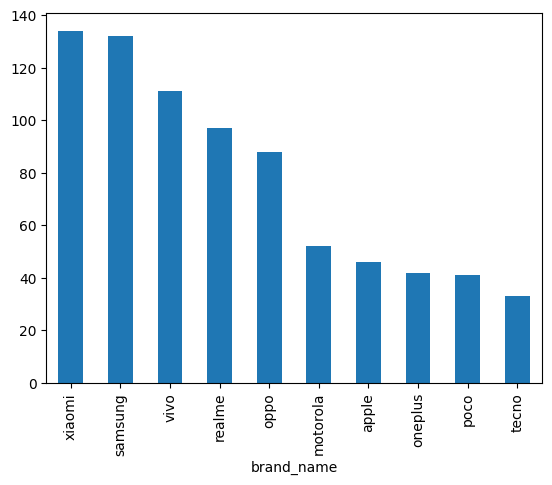

In [ ]:
# Top 10 phone brands (based on number of products)

df['brand_name'].value_counts().head(10).plot(kind='bar')

In [ ]:
'''

price col

'''

'\n\nprice col\n\n'

In [ ]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

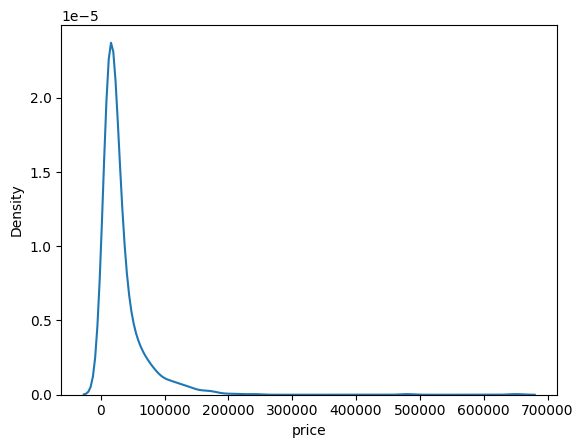

In [ ]:
sns.kdeplot(df['price'])

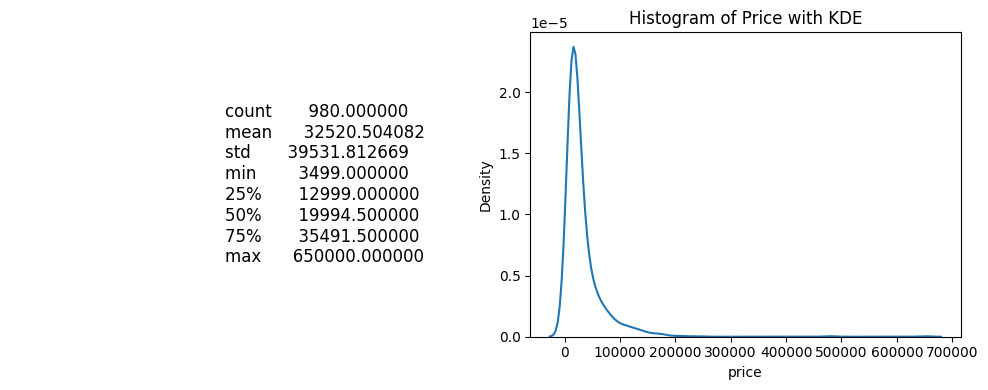

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['price'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['price'], ax=ax2)
ax2.set_title('Histogram of Price with KDE')

plt.tight_layout()
plt.show()

In [ ]:
df['price'].skew()  # positively skewed

6.591790999665567

<Axes: xlabel='price'>

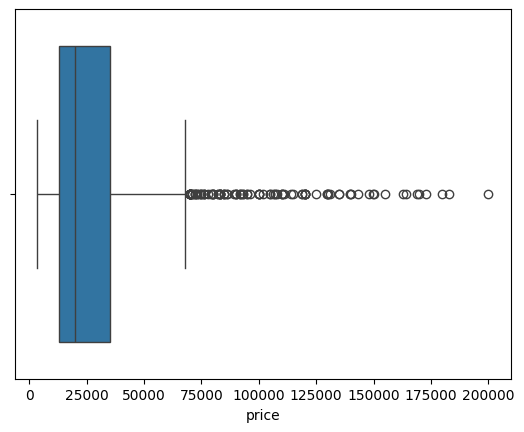

In [ ]:
sns.boxplot(df[df['price']<200000]['price'], orient='h')

In [ ]:
df[df['price']>200000]

brand_name                                   model   price  rating  \
427      vertu                   Vertu Signature Touch  650000    62.0   
478     huawei        Huawei Mate 50 RS Porsche Design  239999    81.0   
887     xiaomi  Xiaomi Redmi K20 Pro Signature Edition  480000    88.0   
951     huawei        Huawei Mate 30 RS Porsche Design  214990     NaN   

     has_5g  has_nfc  has_ir_blaster processor_brand      processor_name  \
427   False     True           False      snapdragon      Snapdragon 801   
478   False     True            True      snapdragon  Snapdragon 8+ Gen1   
887   False     True           False      snapdragon     Snapdragon  855   
951    True     True            True           kirin          Kirin  990   

    processor_core  processor_speed  ram_capacity  base_memory  \
427      Octa Core             1.50           2.0           64   
478      Octa Core             3.20          12.0          512   
887      Octa Core             2.80           8.0          256   
951      Octa Core             2.86          12.0          512   

     battery_capacity  fast_charging  screen_size    resolution  refresh_rate  \
427            2275.0             -1         4.70  1080 x 1920             60   
478            4700.0             66         6.74  1212 x 2616            120   
887            4000.0             27         6.39  1080 x 2340             60   
951            4500.0              0         6.53  1176 x 2400             60   

     num_rear_cam num_front_cam extended_memory       os primary_camera_rear  \
427             1             1               0  android                  13   
478             3             1          256 GB    other                  50   
887             3             1               0  android                  48   
951             4             2          256 GB  android                  40   

    primary_camera_front  
427                  2.1  
478                   13  
887                   20  
951                   32

In [ ]:
df['price'].isnull().sum()

0

In [ ]:
'''

rating col

'''

'\n\nrating col\n\n'

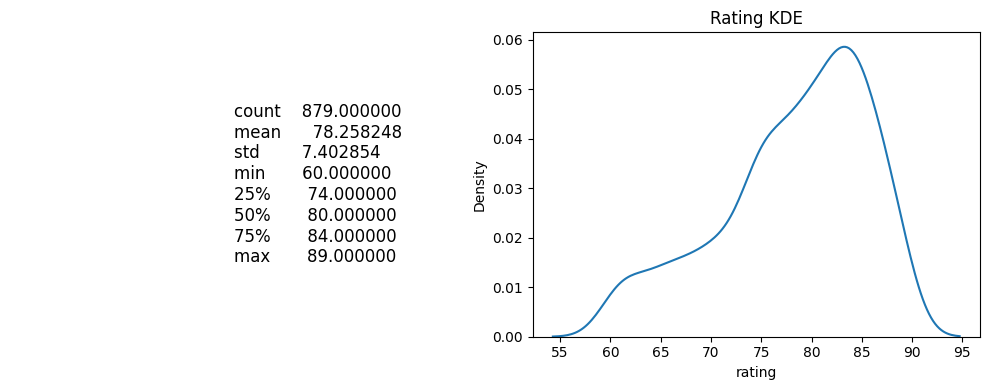

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['rating'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['rating'], ax=ax2)
ax2.set_title('Rating KDE')

plt.tight_layout()
plt.show()

In [ ]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Density'>

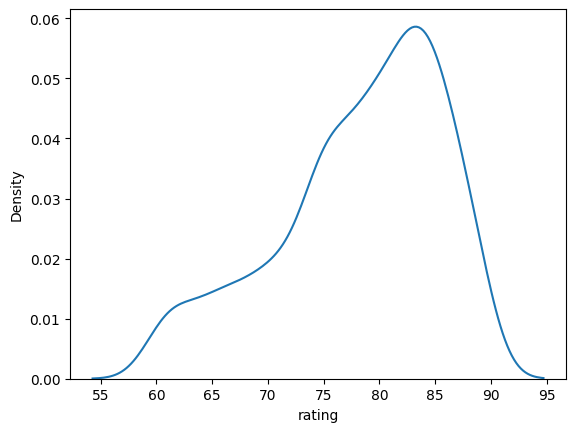

In [ ]:
sns.kdeplot(df['rating'])

In [ ]:
df['rating'].skew()  # negatively skewed

-0.6989993034105535

<Axes: xlabel='rating'>

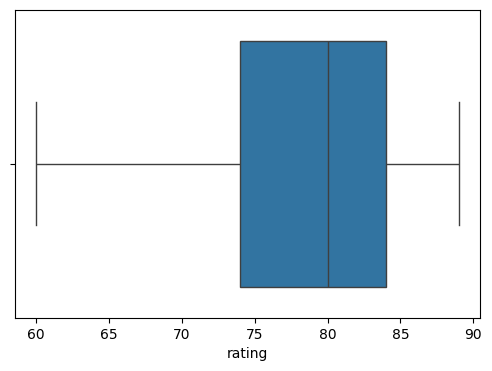

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['rating'], orient='h')

In [ ]:
df['rating'].isnull().sum()

101

In [ ]:
'''

has_5g

'''

'\n\nhas_5g\n\n'

In [ ]:
df['has_5g'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_5g
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [ ]:
df['has_5g'].value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

<Axes: xlabel='has_5g'>

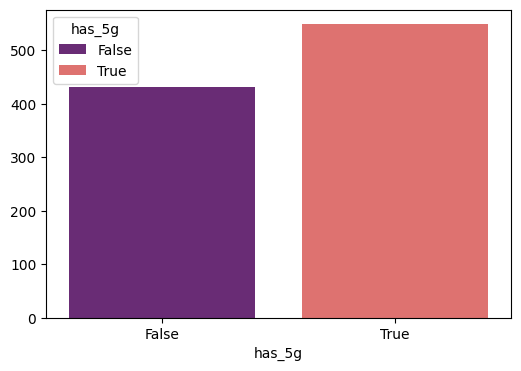

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_5g'].value_counts().index, y = df['has_5g'].value_counts().values, hue = df['has_5g'].value_counts().index, palette = 'magma')

In [ ]:
'''

has_nfc

'''

'\n\nhas_nfc\n\n'

In [ ]:
df['has_nfc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_nfc
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [ ]:
df['has_nfc'].value_counts()

has_nfc
False    587
True     393
Name: count, dtype: int64

<Axes: xlabel='has_nfc'>

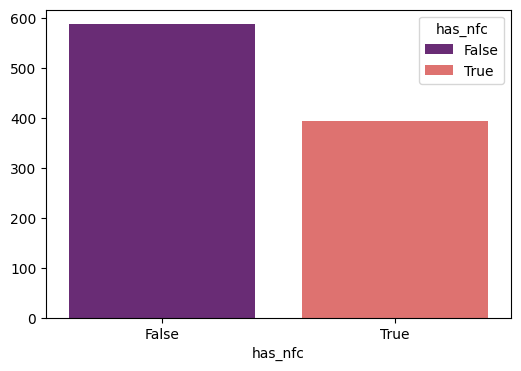

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_nfc'].value_counts().index, y = df['has_nfc'].value_counts().values, hue = df['has_nfc'].value_counts().index, palette = 'magma')

In [ ]:
'''

has_ir_blaster

'''

'\n\nhas_ir_blaster\n\n'

In [ ]:
df['has_ir_blaster'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: has_ir_blaster
Non-Null Count  Dtype
--------------  -----
980 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [ ]:
df['has_ir_blaster'].value_counts()

has_ir_blaster
False    821
True     159
Name: count, dtype: int64

<Axes: xlabel='has_ir_blaster'>

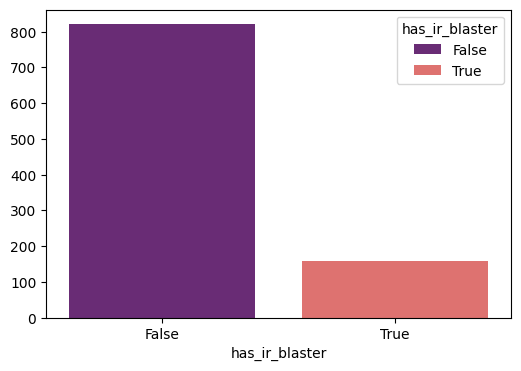

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['has_ir_blaster'].value_counts().index, y = df['has_ir_blaster'].value_counts().values, hue = df['has_ir_blaster'].value_counts().index, palette = 'magma')

In [ ]:
'''

processor_brand

'''

'\n\nprocessor_brand\n\n'

In [ ]:
df['processor_brand'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: processor_brand
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
print(df['processor_brand'].value_counts())

processor_brand
snapdragon    407
helio         201
dimensity     177
exynos         49
bionic         39
unisoc         26
tiger          24
octa           14
google          9
kirin           7
quad            6
qualcomm        5
a13             5
spreadtrum      4
sc9863a         2
apple           1
sanpdragon      1
fusion          1
(28             1
samsung         1
Name: count, dtype: int64


In [ ]:
df['processor_brand'] = df['processor_brand'].str.replace('sanpdragon','snapdragon')
df['processor_brand'] = df['processor_brand'].str.replace('apple','bionic')  # apple processors are reffered as bionic
df['processor_brand'] = df['processor_brand'].str.replace('samsung','exynos')  # samsung processor is also reffered as exynos

In [ ]:
temp_df = df[df['processor_brand'] == 'qualcomm']

In [ ]:
df.loc[temp_df.index, 'processor_brand'] = 'snapdragon'

In [ ]:
temp_df = df[df['processor_brand'] == 'a13']

In [ ]:
df.loc[temp_df.index, 'processor_brand'] = 'bionic'

In [ ]:
df['processor_brand'].isnull().sum()

0

In [ ]:
df.sample(6)

brand_name                                 model   price  rating  has_5g  \
783    samsung  Samsung Galaxy A04 (4GB RAM + 128GB)   12999    72.0   False   
157     realme                         Realme 11 Pro   28999    82.0    True   
533     xiaomi   Xiaomi 12 Pro 5G (12GB RAM + 256GB)   51880     NaN    True   
687       oppo                           OPPO X 2021  134999    86.0   False   
586     xiaomi              Xiaomi Redmi Note 8 2021    9990    75.0   False   
252       iqoo          iQOO Z6 5G (6GB RAM + 128GB)   16940    80.0    True   

     has_nfc  has_ir_blaster processor_brand      processor_name  \
783    False           False           helio           Helio P35   
157    False           False      snapdragon  Snapdragon  8 Gen1   
533     True            True      snapdragon   Snapdragon 8 Gen1   
687    False           False      snapdragon      Snapdragon 865   
586    False            True           helio           Helio G85   
252    False           False      snapdragon    Snapdragon  695    

    processor_core  processor_speed  ram_capacity  base_memory  \
783      Octa Core             2.30           4.0          128   
157      Octa Core             3.00           6.0          128   
533      Octa Core             3.00          12.0          256   
687      Octa Core             2.84           8.0          256   
586      Octa Core             2.00           4.0           64   
252      Octa Core             2.20           6.0          128   

     battery_capacity  fast_charging  screen_size    resolution  refresh_rate  \
783            5000.0              0         6.50   720 x 1600             60   
157            5000.0             65         6.40  1080 x 2400            120   
533            4600.0            120         6.73  1440 x 3200            120   
687            4000.0             45         7.40  1440 x 3200             60   
586            4000.0             18         6.30  1080 x 2340             60   
252            5000.0             18         6.58  1080 x 2408            120   

     num_rear_cam num_front_cam extended_memory       os primary_camera_rear  \
783             2             1            1 TB  android                  50   
157             3             1          256 GB  android                  64   
533             3             1               0  android                  50   
687             3             1               0  android                  64   
586             4             1               0  android                  48   
252             3             1            1 TB  android                  50   

    primary_camera_front  
783                    5  
157                   32  
533                   32  
687                   16  
586                   13  
252                   16

In [ ]:
print(df['processor_brand'].value_counts())

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
octa           14
google          9
kirin           7
quad            6
spreadtrum      4
sc9863a         2
fusion          1
(28             1
Name: count, dtype: int64


In [ ]:
df['processor_brand'] = df['processor_brand'].str.strip()

In [ ]:
temp_df = df[df['processor_brand'] == '(28']

df.loc[temp_df.index, 'processor_brand'] = 'Mediatek'

In [ ]:
print('\033[1m Top 10 processor brands \033[0m')
print(df['processor_brand'].value_counts().head(10))

 Top 10 processor brands 
processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
octa           14
google          9
kirin           7
Name: count, dtype: int64


<Axes: xlabel='processor_brand'>

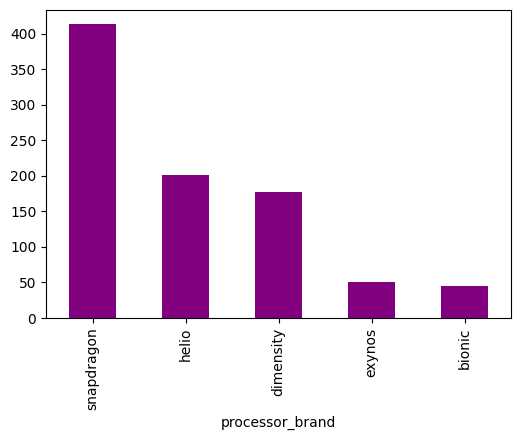

In [ ]:
# Top 5 processor brand

plt.figure(figsize=(6, 4))

df['processor_brand'].value_counts().head(5).plot(kind='bar', color = 'purple')

In [ ]:
'''

processor_core

'''

'\n\nprocessor_core\n\n'

In [ ]:
df['processor_core'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: processor_core
Non-Null Count  Dtype 
--------------  ----- 
974 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
df['processor_core'].value_counts()

processor_core
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

<Axes: xlabel='processor_core'>

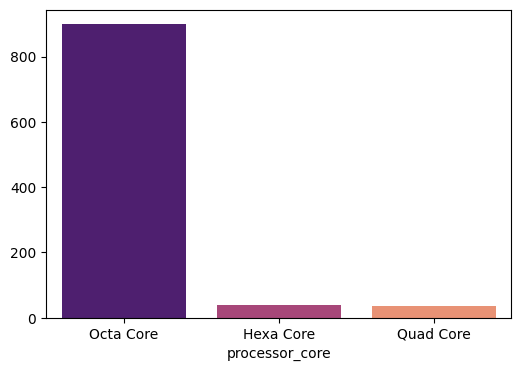

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x = df['processor_core'].value_counts().index, y = df['processor_core'].value_counts().values, hue = df['processor_core'].value_counts().index, palette = 'magma')

In [ ]:
def pc_function(text):
    if pd.notna(text):
        if 'Octa Core' in text:
            return 8
        elif 'Hexa Core' in text:
            return 6
        elif 'Quad Core' in text:
            return 4
        else:
            return text
    else:
        return text

In [ ]:
df['num_cores'] = df['processor_core'].apply(pc_function)

In [ ]:
'''

processor_speed

'''

'\n\nprocessor_speed\n\n'

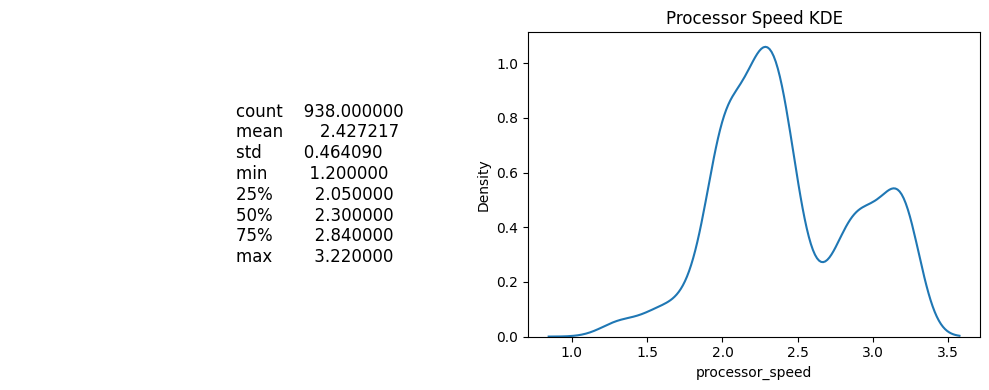

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['processor_speed'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['processor_speed'], ax=ax2)
ax2.set_title('Processor Speed KDE')

plt.tight_layout()
plt.show()

In [ ]:
df['processor_speed'].skew()

0.18833557463624606

<Axes: xlabel='processor_speed'>

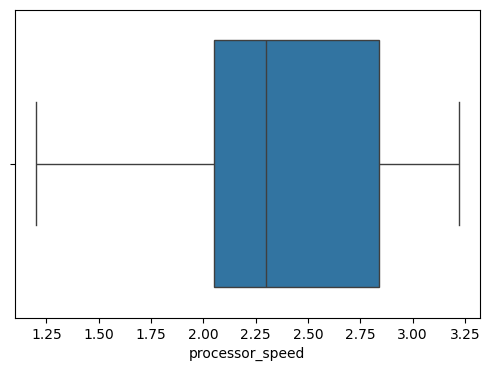

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['processor_speed'], orient='h')

In [ ]:
'''

ram_capacity

'''

'\n\nram_capacity\n\n'

In [ ]:
print(df['ram_capacity'].value_counts().sort_index(ascending = True))

ram_capacity
1.0       7
2.0      32
3.0      54
4.0     215
6.0     234
8.0     339
12.0     86
16.0      9
18.0      2
64.0      2
Name: count, dtype: int64


<Axes: xlabel='ram_capacity'>

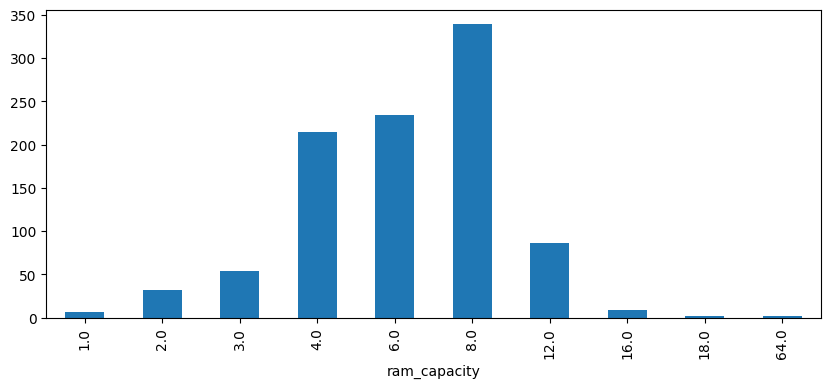

In [ ]:
plt.figure(figsize=(10, 4))

df['ram_capacity'].value_counts().sort_index(ascending = True).plot(kind='bar')

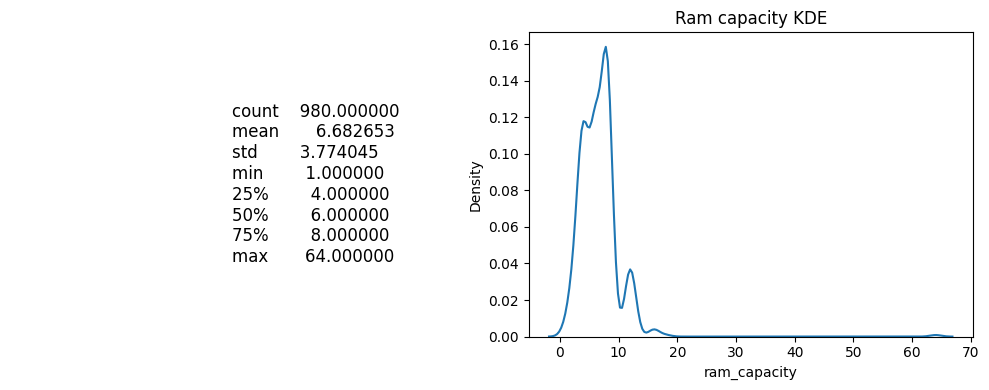

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['ram_capacity'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['ram_capacity'], ax=ax2)
ax2.set_title('Ram capacity KDE')

plt.tight_layout()
plt.show()

In [ ]:
df['ram_capacity'].skew()  # positively skewed

7.406797531322625

<Axes: xlabel='ram_capacity'>

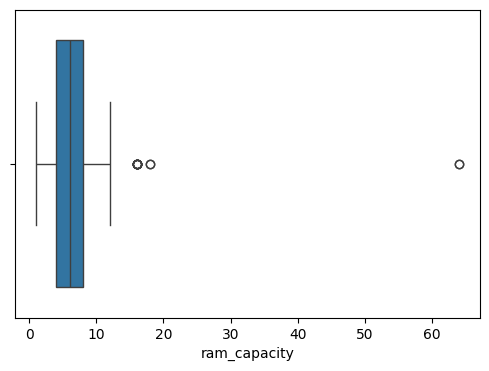

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['ram_capacity'], orient='h')

In [ ]:
df.sample(2)

brand_name              model  price  rating  has_5g  has_nfc  \
950      sharp    Sharp Aquos R5G  59990    88.0   False     True   
714     huawei  Huawei P50 Pro 4G  60999     NaN   False     True   

     has_ir_blaster processor_brand  processor_name processor_core  \
950           False      snapdragon  Snapdragon 865      Octa Core   
714            True      snapdragon  Snapdragon 888      Octa Core   

     processor_speed  ram_capacity  base_memory  battery_capacity  \
950             2.84          12.0          256            3730.0   
714             2.84           8.0          256            4360.0   

     fast_charging  screen_size    resolution  refresh_rate  num_rear_cam  \
950              0          6.5  1440 x 3168             60             3   
714             66          6.6  1288 x 2700            120             4   

    num_front_cam extended_memory       os primary_camera_rear  \
950             1            1 TB  android                  48   
714             1          256 GB    other                  50   

    primary_camera_front  num_cores  
950                   16        8.0  
714                   13        8.0

In [ ]:
'''

base_memory

'''

'\n\nbase_memory\n\n'

In [ ]:
df['base_memory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: base_memory
Non-Null Count  Dtype
--------------  -----
980 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


In [ ]:
#temp_df
df[df['base_memory'].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, processor_name, processor_core, processor_speed, ram_capacity, base_memory, battery_capacity, fast_charging, screen_size, resolution, refresh_rate, num_rear_cam, num_front_cam, extended_memory, os, primary_camera_rear, primary_camera_front, num_cores]
Index: []

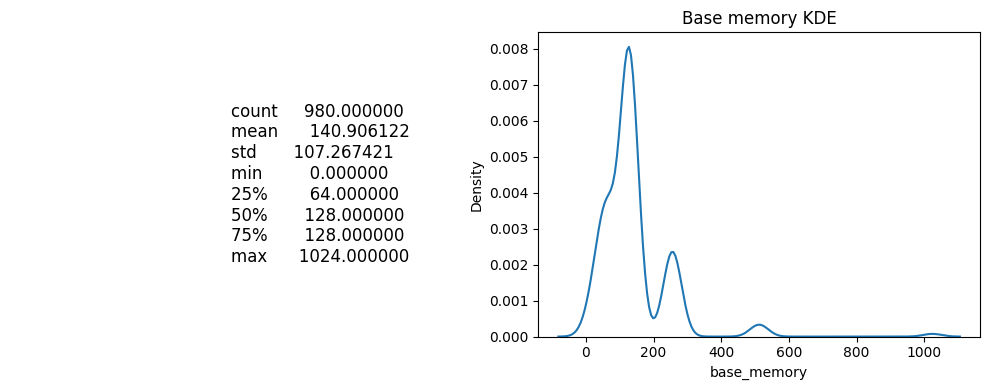

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['base_memory'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['base_memory'], ax=ax2)
ax2.set_title('Base memory KDE')

plt.tight_layout()
plt.show()

In [ ]:
df['base_memory'].skew()  # positively skewed

3.8156751429133333

<Axes: xlabel='base_memory'>

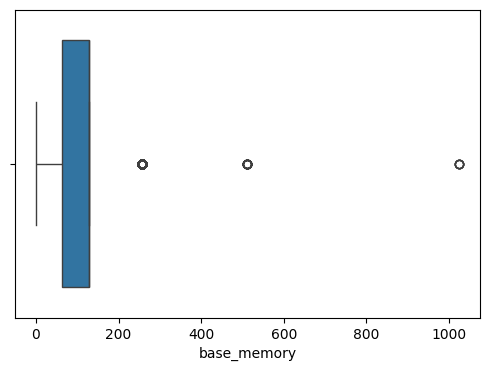

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['base_memory'], orient='h')

In [ ]:
print(df['base_memory'].value_counts().sort_index(ascending=True))

base_memory
0         2
8         1
16       12
32       67
64      191
128     523
256     157
512      22
1024      5
Name: count, dtype: int64


In [ ]:
'''

battery_capacity

'''

'\n\nbattery_capacity\n\n'

In [ ]:
df['battery_capacity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: battery_capacity
Non-Null Count  Dtype  
--------------  -----  
969 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


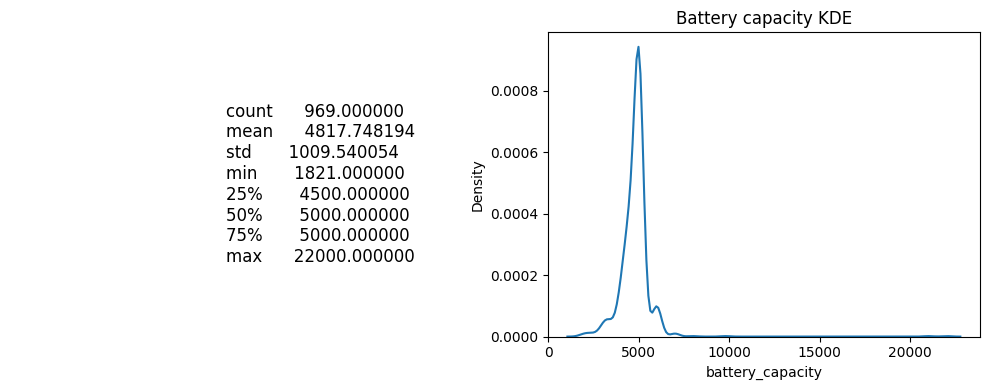

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['battery_capacity'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['battery_capacity'], ax=ax2)
ax2.set_title('Battery capacity KDE')

plt.tight_layout()
plt.show()

In [ ]:
df[df['battery_capacity'] > 7500].head()  # these values can be considered as outliers

brand_name         model  price  rating  has_5g  has_nfc  has_ir_blaster  \
391    oukitel  Oukitel WP19  29990    84.0   False     True           False   
599    oukitel  Oukitel WP21  22990    82.0   False    False           False   
843     doogee  Doogee V Max  45999    88.0    True    False           False   
966    oukitel   Oukitel WP9  25899    72.0   False     True           False   

    processor_brand  processor_name processor_core  processor_speed  \
391           helio       Helio G95      Octa Core              2.0   
599           helio       Helio G99      Octa Core              2.2   
843       dimensity  Dimensity 1080      Octa Core              2.6   
966           helio       Helio P60      Octa Core              2.0   

     ram_capacity  base_memory  battery_capacity  fast_charging  screen_size  \
391           8.0          256           21000.0             33         6.78   
599          12.0          256            9800.0             66         6.78   
843          12.0          256           22000.0             33         6.58   
966           6.0          128            8000.0             -1         5.86   

       resolution  refresh_rate  num_rear_cam num_front_cam extended_memory  \
391  1080 x 2400             60             3             1               0   
599  1080 x 2400            120             3             1               0   
843  1080 x 2408            120             3             1            2 TB   
966   720 x 1520             60             3             1               0   

                os primary_camera_rear primary_camera_front  num_cores  
391        android                  64                   16        8.0  
599  Not Specified                  64                 Main        8.0  
843        android                 108                   32        8.0  
966        android                  16                    8        8.0

<Axes: xlabel='battery_capacity'>

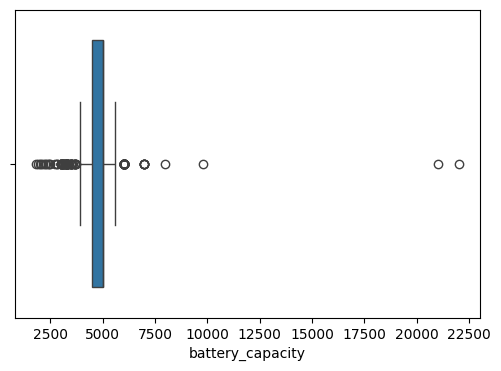

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['battery_capacity'], orient='h')

In [ ]:
df['battery_capacity'].skew()  # highly positively skewed

9.260986328291182

In [ ]:
'''

fast_charging

'''

'\n\nfast_charging\n\n'

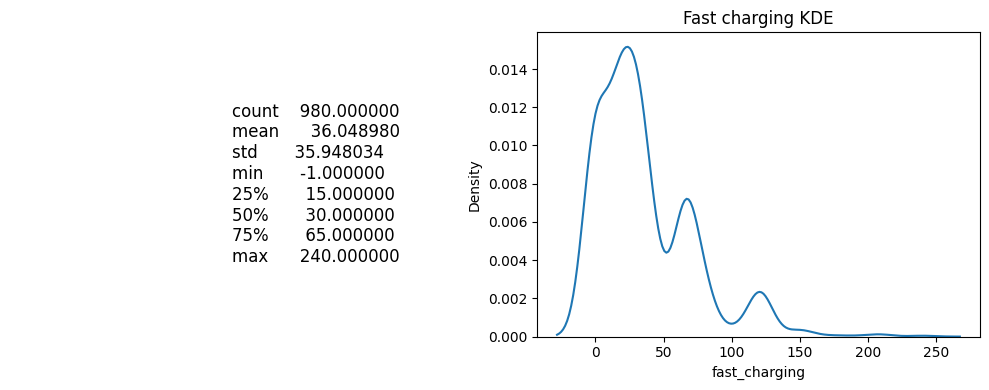

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['fast_charging'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['fast_charging'], ax=ax2)
ax2.set_title('Fast charging KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='fast_charging'>

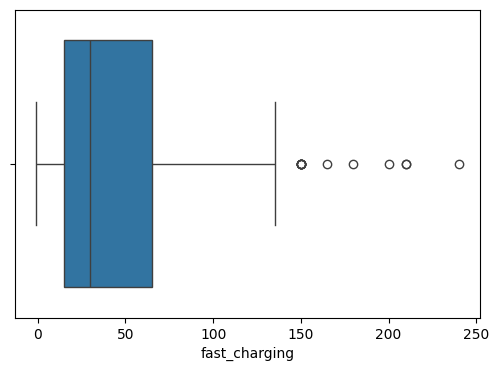

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['fast_charging'], orient='h')

In [ ]:
df['fast_charging'].skew()

1.5065740071474616

In [ ]:
df['fast_charging'] = df['fast_charging'].astype(float)

In [ ]:
df['fast_charging'] = df['fast_charging'].apply(lambda x : np.nan if x == -1 or x == 0 else x)

In [ ]:
def fun(row):
  if row['fast_charging'] == -1:
    return 0
  else:
    return 1

In [ ]:
fast_charging_available = df.apply(fun, axis=1)
df.insert(15, 'fast_charging_available', fast_charging_available)

In [ ]:
'''

screen_size

'''

'\n\nscreen_size\n\n'

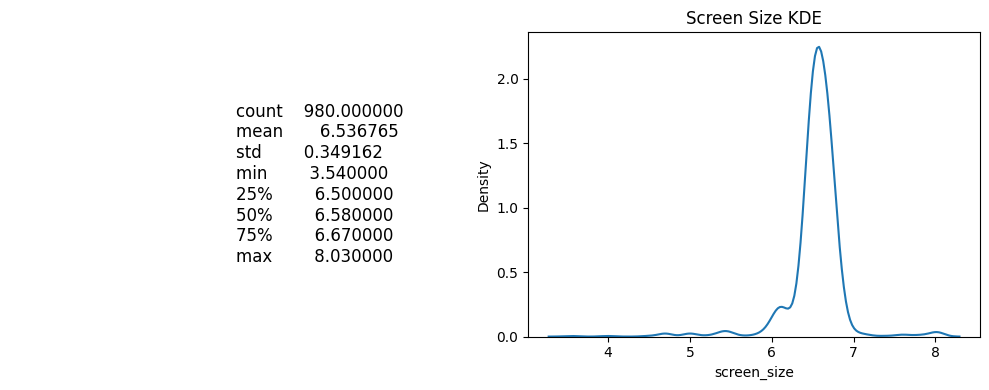

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['screen_size'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['screen_size'], ax=ax2)
ax2.set_title('Screen Size KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='screen_size'>

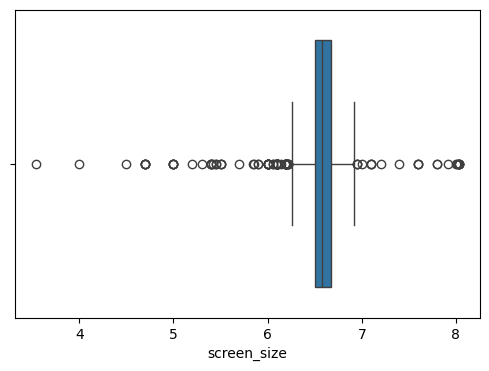

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['screen_size'], orient='h')

In [ ]:
df['screen_size'].skew()

-2.11619902968816

In [ ]:
'''

resolution

'''

'\n\nresolution\n\n'

In [ ]:
df['resolution'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: resolution
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
'''

refresh_rate

'''

'\n\nrefresh_rate\n\n'

In [ ]:
df['refresh_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: refresh_rate
Non-Null Count  Dtype
--------------  -----
980 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


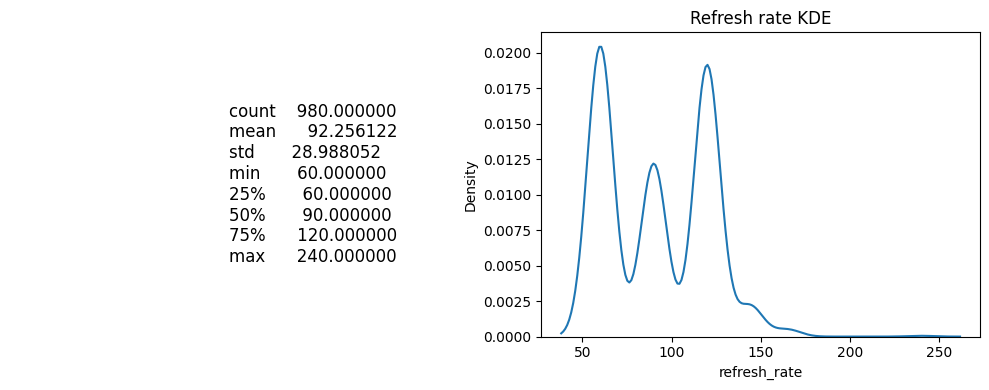

In [ ]:
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['refresh_rate'].describe().to_string()
ax1.text(0.5, 0.5, stats, fontsize=12, va='center')
ax1.axis('off')

# Subplot 2: KDE
ax2 = fig.add_subplot(1, 2, 2)
sns.kdeplot(df['refresh_rate'], ax=ax2)
ax2.set_title('Refresh rate KDE')

plt.tight_layout()
plt.show()

<Axes: xlabel='refresh_rate'>

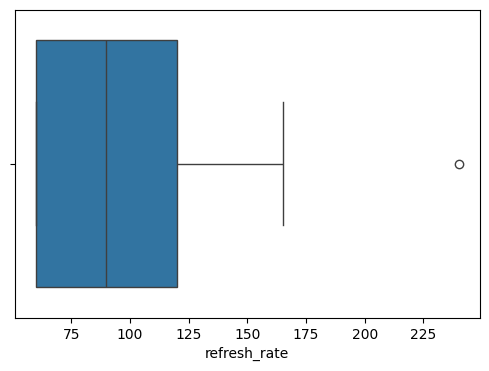

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(df['refresh_rate'], orient='h')

In [ ]:
df['refresh_rate'].skew()

0.29773297483356714

In [ ]:
df['refresh_rate'].value_counts().sort_index(ascending=True)

refresh_rate
60     368
90     219
120    344
144     39
165      9
240      1
Name: count, dtype: int64

In [ ]:
sns.barplot(df['refresh_rate'].value_counts().sort_index(ascending=True))

<Axes: xlabel='refresh_rate', ylabel='count'>

In [ ]:
'''

extended_memory

'''

'\n\nextended_memory\n\n'

In [ ]:
df['extended_memory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: extended_memory
Non-Null Count  Dtype 
--------------  ----- 
980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
df['extended_memory'].value_counts()

extended_memory
0          480
1 TB       262
512 GB     116
256 GB     100
128 GB       9
2 TB         6
32 GB        3
64 GB        3
1000 GB      1
Name: count, dtype: int64

In [ ]:
ext_val_avl = df['extended_memory'].apply(lambda x : 0 if x == '0' else 1)
df.insert(22, 'extended_memory_available', ext_val_avl)

In [ ]:
df['extended_memory'] = df['extended_memory'].str.strip()

In [ ]:
def update_extended_memory(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == '1 TB':
      return 1024
    elif row['extended_memory'] == '512 GB':
      return 512
    elif row['extended_memory'] == '256 GB':
      return 256
    elif row['extended_memory'] == '128 GB':
      return 128
    elif row['extended_memory'] == '2 TB':
      return 2048
    elif row['extended_memory'] == '32 GB':
      return 32
    elif row['extended_memory'] == '64 GB':
      return 64
    elif row['extended_memory'] == '1000 GB':
      return 1024
    else:
      return row['extended_memory']

In [ ]:
df['extended_memory'] = df.apply(update_extended_memory, axis=1)

In [ ]:
def transform(row):
  if row['extended_memory'] == 1000:
    return 1024
  else:
    return row['extended_memory']

df['extended_memory'] = df.apply(transform, axis=1)

In [ ]:
df['extended_memory'].value_counts()

extended_memory
1024.0    263
512.0     116
256.0     100
128.0       9
2048.0      6
32.0        3
64.0        3
Name: count, dtype: int64

In [ ]:
'''

num_rear_cam

'''

'\n\nnum_rear_cam\n\n'

In [ ]:
df['num_rear_cam'].value_counts().sort_index(ascending=True).plot(kind='bar')

<Axes: xlabel='num_rear_cam'>

In [ ]:
'''

num_front_cam

'''

'\n\nnum_front_cam\n\n'

<Axes: xlabel='num_front_cam'>

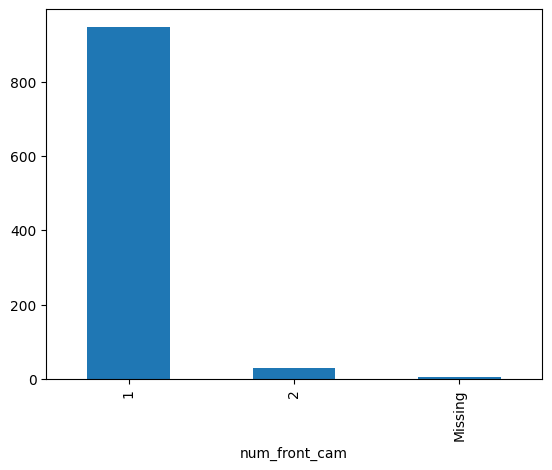

In [ ]:
df['num_front_cam'].value_counts().plot(kind='bar')

In [ ]:
tp = df[df['num_front_cam'] == 'Missing']
df.loc[tp.index, 'num_front_cam'] = 0

In [ ]:
'''

primary_camera_rear

'''

'\n\nprimary_camera_rear\n\n'

In [ ]:
df['primary_camera_rear'].value_counts()

primary_camera_rear
50          336
64          181
13          116
48          112
108          80
12           55
8            39
200          18
16           17
5             6
12.2          4
20            3
50.3          3
54            3
2             2
24            2
Foldable      1
47.2          1
40            1
Name: count, dtype: int64

In [ ]:
'''

primary_camera_front

'''

'\n\nprimary_camera_front\n\n'

In [ ]:
print(df['primary_camera_front'].value_counts())

primary_camera_front
16      307
8       178
32      155
5       119
12       46
13       41
20       37
10       23
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
Main      1
10.7      1
10.1      1
12.6      1
Name: count, dtype: int64


In [ ]:
df['primary_camera_front'] = df['primary_camera_front'].apply(lambda x : np.nan if x == 'Main' else x).astype(float)

In [ ]:
'''

os

'''

'\n\nos\n\n'

In [ ]:
df['os'].value_counts()

os
android          910
ios               46
Not Specified     14
other             10
Name: count, dtype: int64

In [ ]:
def os_funct(text):

  if 'Memory' in text:
    return np.nan
  elif 'Not Specified' in text:
    return 'other'
  else:
    return text

In [ ]:
df['os'] = df['os'].apply(os_funct)

In [ ]:
df['os'].value_counts()

os
android    910
ios         46
other       24
Name: count, dtype: int64

In [ ]:
temp_df = df[['processor_name', 'extended_memory']]

In [ ]:
df.drop(columns=['processor_name'], inplace = True)

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'processor_core',
       'processor_speed', 'ram_capacity', 'base_memory', 'battery_capacity',
       'fast_charging', 'fast_charging_available', 'screen_size', 'resolution',
       'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory',
       'extended_memory_available', 'os', 'primary_camera_rear',
       'primary_camera_front', 'num_cores'],
      dtype='object')

In [ ]:
df['price'] = df['price'].astype(float)

In [ ]:
df.sample(2)

brand_name                  model    price  rating  has_5g  has_nfc  \
102   motorola  Motorola Moto S30 Pro  23990.0    83.0    True    False   
164    samsung     Samsung Galaxy F13  10999.0    74.0   False     True   

     has_ir_blaster processor_brand processor_core  processor_speed  \
102           False      snapdragon      Octa Core              2.9   
164           False          exynos      Octa Core              2.0   

     ram_capacity  base_memory  battery_capacity  fast_charging  \
102           8.0          128            4400.0           68.0   
164           4.0           64            6000.0           15.0   

     fast_charging_available  screen_size    resolution  refresh_rate  \
102                        1         6.55  1080 x 2460            144   
164                        1         6.60  2408 x 1080             60   

     num_rear_cam num_front_cam  extended_memory  extended_memory_available  \
102             3             1              NaN                          0   
164             3             1           1024.0                          1   

          os primary_camera_rear  primary_camera_front  num_cores  
102  android                  50                  32.0        8.0  
164  android                  50                   8.0        8.0

In [ ]:
tpdfx = df[['price', 'rating', 'has_5g', 'has_nfc', 'processor_speed', 'has_ir_blaster', 'ram_capacity', 'base_memory', 'battery_capacity', 'fast_charging', 'screen_size', 'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory_available', 'num_cores']]

In [ ]:
tpdfx.sample(6)

price  rating  has_5g  has_nfc  processor_speed  has_ir_blaster  \
347  21999.0    79.0    True     True             2.20           False   
810  15499.0    74.0   False    False             2.40           False   
629  39990.0    86.0    True     True             3.20           False   
801  59999.0    88.0    True    False             3.05           False   
483  92980.0     NaN    True     True             3.00           False   
34   23790.0    85.0    True    False             2.40           False   

     ram_capacity  base_memory  battery_capacity  fast_charging  screen_size  \
347           4.0          128            5000.0           10.0         6.50   
810           4.0          128            5000.0           18.0         6.51   
629           6.0          128            4500.0           25.0         6.71   
801          12.0          256            4500.0           80.0         6.78   
483          12.0          512            5000.0           30.0         6.50   
34            6.0          128            5000.0           25.0         6.70   

     refresh_rate  num_rear_cam num_front_cam  extended_memory_available  \
347           120             2             1                          1   
810            90             3             1                          1   
629           120             3             1                          1   
801           120             3             1                          0   
483           120             4             1                          0   
34            120             4             1                          1   

     num_cores  
347        8.0  
810        8.0  
629        8.0  
801        8.0  
483        8.0  
34         8.0

In [ ]:
tpdfx.corr()['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
processor_speed              0.628446
has_ir_blaster               0.156421
ram_capacity                 0.542422
base_memory                  0.482552
battery_capacity            -0.015581
fast_charging                0.527613
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cam                 0.515531
num_front_cam                0.131480
extended_memory_available   -0.343502
num_cores                    0.199741
Name: rating, dtype: float64

In [ ]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64

In [ ]:
'''

num_cores

'''

'\n\nnum_cores\n\n'

In [ ]:
df['processor_core'] = df['processor_core'].replace('Octa Core', '8')
df['processor_core'] = df['processor_core'].replace('Hexa Core', '6')
df['processor_core'] = df['processor_core'].replace('Quad Core', '4')

In [ ]:
df.sample(2)

brand_name                     model     price  rating  has_5g  has_nfc  \
362    samsung  Samsung Galaxy S24 Ultra  119990.0    85.0    True    False   
199       oppo                 OPPO A77s   17999.0    76.0   False    False   

     has_ir_blaster processor_brand processor_core  processor_speed  \
362           False      snapdragon              8              NaN   
199           False      snapdragon              8              2.4   

     ram_capacity  base_memory  battery_capacity  fast_charging  \
362          12.0          256            5100.0           45.0   
199           8.0          128            5000.0           33.0   

     fast_charging_available  screen_size    resolution  refresh_rate  \
362                        1         6.83  1200 x 2860            144   
199                        1         6.56   720 x 1600             90   

     num_rear_cam num_front_cam  extended_memory  extended_memory_available  \
362             4             1              NaN                          0   
199             2             1              NaN                          0   

          os primary_camera_rear  primary_camera_front  num_cores  
362  android                 200                  60.0        8.0  
199  android                  50                   8.0        8.0

In [ ]:
df.to_csv('smartphone_cleaned_v4.csv', index=False)

In [ ]:
new_df = pd.read_csv('/content/smartphone_cleaned_v4.csv')

In [ ]:
print(new_df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64


In [ ]:
tp_df = df[['price', 'rating', 'has_5g', 'has_nfc', 'processor_speed', 'has_ir_blaster', 'ram_capacity', 'base_memory', 'battery_capacity', 'fast_charging', 'screen_size', 'refresh_rate', 'num_rear_cam', 'num_front_cam', 'extended_memory_available', 'num_cores']]

In [ ]:
from sklearn.impute import KNNImputer

print("Missing values before imputation:\n", tp_df.isnull().sum())

Missing values before imputation:
 price                          0
rating                       101
has_5g                         0
has_nfc                        0
processor_speed               42
has_ir_blaster                 0
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
screen_size                    0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory_available      0
num_cores                      6
dtype: int64


In [ ]:
knn = KNNImputer(n_neighbors=3, weights  = 'distance')

return_array = knn.fit_transform(tp_df)

In [ ]:
imputed_df = pd.DataFrame(return_array, columns=tp_df.columns)

In [ ]:
x = imputed_df.corr()[['price']].reset_index()

y = tp_df.corr()[['price']].reset_index()

In [ ]:
merged_corr = x.merge(y, on='index', suffixes=('_imputed', '_original'))

In [ ]:
merged_corr['difference'] = merged_corr['price_imputed'] - merged_corr['price_original']

merged_corr

index  price_imputed  price_original  difference
0                       price       1.000000        1.000000    0.000000
1                      rating       0.343610        0.283504    0.060107
2                      has_5g       0.305066        0.305066    0.000000
3                     has_nfc       0.470951        0.470951    0.000000
4             processor_speed       0.496817        0.474049    0.022768
5              has_ir_blaster      -0.015807       -0.015807    0.000000
6                ram_capacity       0.292540        0.292540    0.000000
7                 base_memory       0.556033        0.556033    0.000000
8            battery_capacity      -0.158560       -0.159232    0.000672
9               fast_charging       0.256367        0.277591   -0.021225
10                screen_size       0.113253        0.113253    0.000000
11               refresh_rate       0.244115        0.244115    0.000000
12               num_rear_cam       0.125330        0.125330    0.000000
13              num_front_cam       0.055305        0.055305    0.000000
14  extended_memory_available      -0.357874       -0.357874    0.000000
15                  num_cores      -0.059385       -0.048561   -0.010824

In [ ]:
df['brand_name'] = df['brand_name'].astype('category')

In [ ]:
df.sample(6)

brand_name                               model    price  rating  has_5g  \
292     realme    Realme C11 2021 (4GB RAM + 64GB)   7749.0    61.0   False   
585        jio  Jio JioPhone Next (3GB RAM + 32GB)   7499.0     NaN   False   
141       oppo                  OPPO Reno 9 Pro 5G  39999.0    86.0    True   
376     realme                      Realme GT 2 5G  28994.0    84.0    True   
949    oneplus                           OnePlus Z  24999.0    79.0   False   
767       oppo                            OPPO A54  12199.0    70.0   False   

     has_nfc  has_ir_blaster processor_brand processor_core  processor_speed  \
292    False           False         sc9863a              8             1.60   
585    False           False      snapdragon              4             1.30   
141     True           False       dimensity              8             2.85   
376     True           False      snapdragon              8             2.84   
949    False           False      snapdragon              8             2.40   
767    False           False           helio              8             2.30   

     ram_capacity  base_memory  battery_capacity  fast_charging  \
292           4.0           64            5000.0            NaN   
585           3.0           32            3000.0            NaN   
141          16.0          256            4500.0           67.0   
376           8.0          128            5000.0           65.0   
949           8.0          128            4300.0           30.0   
767           4.0           64            5000.0            NaN   

     fast_charging_available  screen_size    resolution  refresh_rate  \
292                        1         6.52   720 x 1600             60   
585                        1         5.50   720 x 1440             60   
141                        1         6.70  1080 x 2412            120   
376                        1         6.62  1080 x 2400            120   
949                        1         6.55  1080 x 2400             90   
767                        1         6.51   1600 x 720             60   

     num_rear_cam num_front_cam  extended_memory  extended_memory_available  \
292             1             1              NaN                          0   
585             1             1              NaN                          0   
141             2             1              NaN                          0   
376             3             1              NaN                          0   
949             3             1              NaN                          0   
767             3             1            256.0                          1   

          os primary_camera_rear  primary_camera_front  num_cores  
292  android                   8                   5.0        8.0  
585  android                  13                   8.0        4.0  
141  android                  50                  32.0        8.0  
376  android                  50                  16.0        8.0  
949  android                  64                  16.0        8.0  
767  android                  13                  16.0        8.0

In [ ]:
temp_df

processor_name  extended_memory
0    Snapdragon 8 Gen2              NaN
1       Snapdragon 695           1024.0
2          Exynos 1330           1024.0
3      Snapdragon  695           1024.0
4       Dimensity 1080              NaN
..                 ...              ...
975  Snapdragon 8 Gen1              NaN
976   Snapdragon  480+           1024.0
977     Dimensity 8100              NaN
978     Snapdragon 695           1024.0
979                NaN           1024.0

[980 rows x 2 columns]

In [ ]:
df.to_csv('smartphone_cleaned_v6.csv', index = False)


# **3. EDA - 2**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv("/content/smartphone_cleaned_v6.csv")

In [5]:
df.shape

(980, 26)

In [6]:
df.size

25480

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   processor_core             974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  base_memory                980 non-null    int64  
 12  battery_capacity           969 non-null    float64
 13  fast_charging              769 non-null    float64

In [8]:
df.describe()

price      rating  processor_core  processor_speed  \
count     980.000000  879.000000      974.000000       938.000000   
mean    32520.504082   78.258248        7.772074         2.427217   
std     39531.812669    7.402854        0.836845         0.464090   
min      3499.000000   60.000000        4.000000         1.200000   
25%     12999.000000   74.000000        8.000000         2.050000   
50%     19994.500000   80.000000        8.000000         2.300000   
75%     35491.500000   84.000000        8.000000         2.840000   
max    650000.000000   89.000000        8.000000         3.220000   

       ram_capacity  base_memory  battery_capacity  fast_charging  \
count    980.000000   980.000000        969.000000     769.000000   
mean       6.682653   140.906122       4817.748194      46.126138   
std        3.774045   107.267421       1009.540054      34.277870   
min        1.000000     0.000000       1821.000000      10.000000   
25%        4.000000    64.000000       4500.000000      18.000000   
50%        6.000000   128.000000       5000.000000      33.000000   
75%        8.000000   128.000000       5000.000000      66.000000   
max       64.000000  1024.000000      22000.000000     240.000000   

       fast_charging_available  screen_size  refresh_rate  num_rear_cam  \
count                    980.0   980.000000    980.000000    980.000000   
mean                       1.0     6.536765     92.256122      2.814286   
std                        0.0     0.349162     28.988052      0.776441   
min                        1.0     3.540000     60.000000      1.000000   
25%                        1.0     6.500000     60.000000      2.000000   
50%                        1.0     6.580000     90.000000      3.000000   
75%                        1.0     6.670000    120.000000      3.000000   
max                        1.0     8.030000    240.000000      4.000000   

       num_front_cam  extended_memory  extended_memory_available  \
count     980.000000       500.000000                 980.000000   
mean        1.025510       736.064000                   0.510204   
std         0.181814       366.894911                   0.500151   
min         0.000000        32.000000                   0.000000   
25%         1.000000       512.000000                   0.000000   
50%         1.000000      1024.000000                   1.000000   
75%         1.000000      1024.000000                   1.000000   
max         2.000000      2048.000000                   1.000000   

       primary_camera_front   num_cores  
count            970.000000  974.000000  
mean              16.614845    7.772074  
std               10.898756    0.836845  
min                0.300000    4.000000  
25%                8.000000    8.000000  
50%               16.000000    8.000000  
75%               16.000000    8.000000  
max               60.000000    8.000000

In [9]:
print(df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
processor_core                 6
processor_speed               42
ram_capacity                   0
base_memory                    0
battery_capacity              11
fast_charging                211
fast_charging_available        0
screen_size                    0
resolution                     0
refresh_rate                   0
num_rear_cam                   0
num_front_cam                  0
extended_memory              480
extended_memory_available      0
os                             0
primary_camera_rear            0
primary_camera_front          10
num_cores                      6
dtype: int64


In [10]:
df.sample(6)

brand_name                             model     price  rating  has_5g  \
683       vivo                         Vivo Y21s   14990.0    74.0   False   
972       itel                         itel A23s    4787.0     NaN   False   
292     realme  Realme C11 2021 (4GB RAM + 64GB)    7749.0    61.0   False   
45     samsung             Samsung Galaxy M33 5G   17478.0    81.0    True   
151   motorola                 Motorola Moto G52   11999.0    75.0   False   
613      apple       Apple iPhone 12 Pro (512GB)  139900.0    80.0    True   

     has_nfc  has_ir_blaster processor_brand  processor_core  processor_speed  \
683    False           False           helio             8.0              2.0   
972    False           False      spreadtrum             4.0              1.4   
292    False           False         sc9863a             8.0              1.6   
45      True           False          exynos             8.0              2.4   
151     True           False      snapdragon             8.0              2.4   
613     True           False          bionic             6.0              3.1   

     ram_capacity  base_memory  battery_capacity  fast_charging  \
683           4.0          128            5000.0           18.0   
972           2.0           32            3020.0            NaN   
292           4.0           64            5000.0            NaN   
45            6.0          128            6000.0           25.0   
151           4.0           64            5000.0           33.0   
613           6.0          512               NaN            NaN   

     fast_charging_available  screen_size    resolution  refresh_rate  \
683                        1         6.51   720 x 1600             60   
972                        1         5.00    854 x 480             60   
292                        1         6.52   720 x 1600             60   
45                         1         6.60  1080 x 2400            120   
151                        1         6.60  2460 x 1080             90   
613                        1         6.10  1170 x 2532             60   

     num_rear_cam  num_front_cam  extended_memory  extended_memory_available  \
683             3              1           1024.0                          1   
972             1              0              NaN                          0   
292             1              1              NaN                          0   
45              4              1           1024.0                          1   
151             3              1              NaN                          0   
613             3              1              NaN                          0   

          os primary_camera_rear  primary_camera_front  num_cores  
683  android                  50                   8.0        8.0  
972  android                   2                   NaN        4.0  
292  android                   8                   5.0        8.0  
45   android                  50                   8.0        8.0  
151  android                  50                  16.0        8.0  
613      ios                  12                  12.0        6.0

## **Univariate Analysis**

### **Categorical Columns - Univariate Analysis**

#### **brand_name**

In [11]:
# Top 10 brands

df['brand_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color = 'purple')

<Axes: xlabel='brand_name'>

<ipython-input-12-81b6d7255a0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['brand_name'], order=df['brand_name'].value_counts().index, palette = 'viridis')


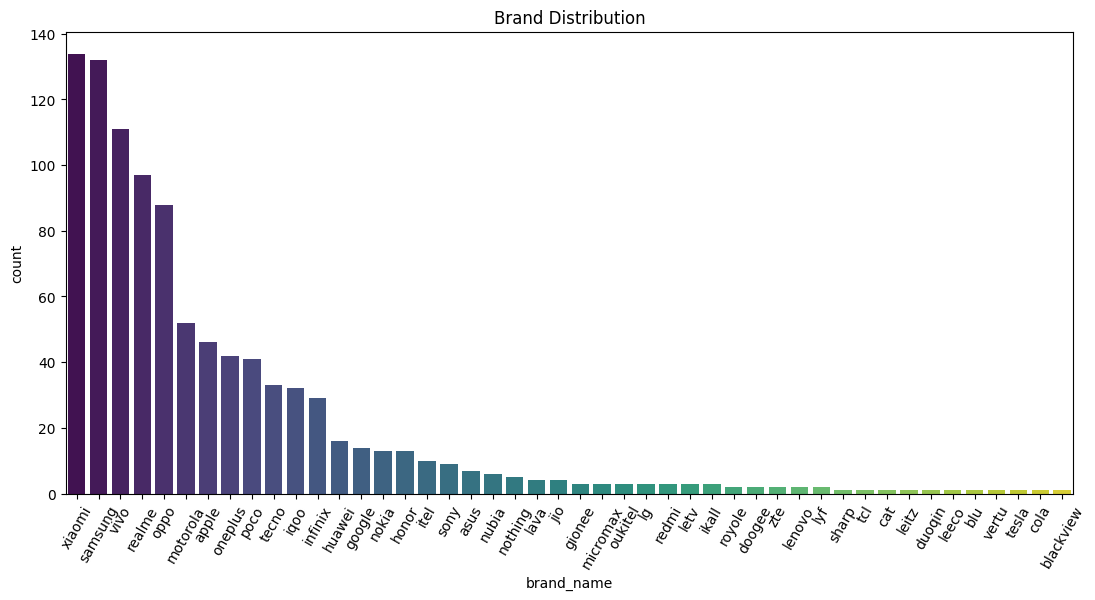

In [12]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x=df['brand_name'], order=df['brand_name'].value_counts().index, palette = 'viridis')
plt.title("Brand Distribution")
plt.xticks(rotation=60)
plt.show()

In [13]:
# Top 10 brands

df['brand_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

In [14]:
df['brand_name'].value_counts(normalize=True).cumsum()

brand_name
xiaomi       0.136735
samsung      0.271429
vivo         0.384694
realme       0.483673
oppo         0.573469
motorola     0.626531
apple        0.673469
oneplus      0.716327
poco         0.758163
tecno        0.791837
iqoo         0.824490
infinix      0.854082
huawei       0.870408
google       0.884694
nokia        0.897959
honor        0.911224
itel         0.921429
sony         0.930612
asus         0.937755
nubia        0.943878
nothing      0.948980
lava         0.953061
jio          0.957143
gionee       0.960204
micromax     0.963265
oukitel      0.966327
lg           0.969388
redmi        0.972449
letv         0.975510
ikall        0.978571
royole       0.980612
doogee       0.982653
zte          0.984694
lenovo       0.986735
lyf          0.988776
sharp        0.989796
tcl          0.990816
cat          0.991837
leitz        0.992857
duoqin       0.993878
leeco        0.994898
blu          0.995918
vertu        0.996939
tesla        0.997959
cola         0.998980
blackview    1.000000
Name: proportion, dtype: float64

In [15]:
# Pareto Analysis
brand_counts = df['brand_name'].value_counts(normalize=True).cumsum()
plt.figure(figsize=(15, 4))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")
plt.axhline(0.8, color='red', linestyle='--', label='80% Threshold')
plt.title("Pareto Chart: Brand Dominance")
plt.xticks(rotation=65)
plt.show()

<ipython-input-15-9fcc6cb5b447>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")


#### **model**

In [16]:
df['model'].nunique()

980

#### **processor_brand**

In [17]:
plt.figure(figsize=(10, 5))

order = df['processor_brand'].value_counts().index

ax = sns.countplot(data=df, x='processor_brand', order=order, palette='coolwarm', edgecolor='black')

ax.set_title("Processor Brand Distribution", fontsize=16)
ax.set_xlabel("Processor Brand", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{height}',
                (patch.get_x() + patch.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-17-a0288c94598f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='processor_brand', order=order, palette='coolwarm', edgecolor='black')


In [18]:
fig = plt.figure(figsize=(13, 6))

# Subplot 1: Summary statistics
ax1 = fig.add_subplot(1, 2, 1)
stats = df['processor_brand'].value_counts().sort_values(ascending=False)
stats_text = stats.to_string()
ax1.text(0.35, 0.5, stats_text, fontsize=12, va='center', ha='left', family='monospace')
ax1.axis('off')
ax1.set_title('Processor Brand Counts', fontsize=14, pad=20)

# Subplot 2: Pie chart
ax2 = fig.add_subplot(1, 2, 2)
top_brands = df['processor_brand'].value_counts().sort_values(ascending=False).head(10)
top_brands.plot(kind='pie', autopct='%0.1f%%', ax=ax2, counterclock=True, wedgeprops={'edgecolor': 'black'})
ax2.set_ylabel('')
ax2.set_title('Top 10 Processor Brand Market Share', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

#### **os**

<ipython-input-19-7e784f2a0b89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['os'], order=df['os'].value_counts().index, palette = 'coolwarm')


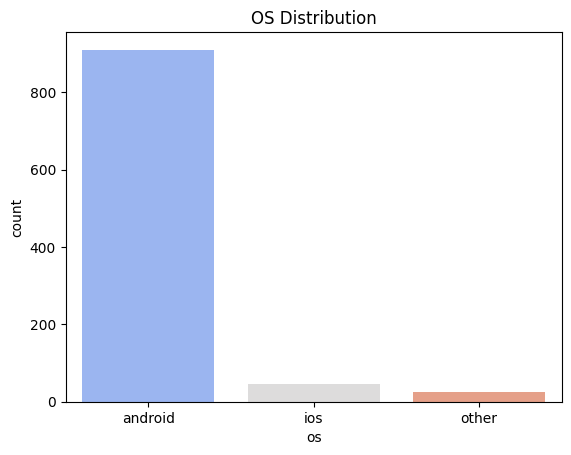

In [19]:
sns.countplot(data=df, x=df['os'], order=df['os'].value_counts().index, palette = 'coolwarm')
plt.title("OS Distribution")
plt.show()

In [20]:
colors = ("violet", "pink", "beige")

df['os'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%0.1f%%', colors=colors)

<Axes: ylabel='count'>

#### **resolution**

In [21]:
df['resolution'].nunique()

83

In [22]:
temp_df = df['resolution'].value_counts().reset_index().head(10)
temp_df.columns = ['resolution', 'count']

temp_df

resolution  count
0  1080 x 2400     342
1   720 x 1600     149
2  1080 x 2408      65
3  1080 x 2412      58
4  1080 x 2340      43
5  1080 x 2460      39
6  1440 x 3200      31
7   720 x 1612      18
8  1170 x 2532      16
9   720 x 1560      13

<ipython-input-23-993cd5ab1634>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='resolution', y='count', palette = 'coolwarm')


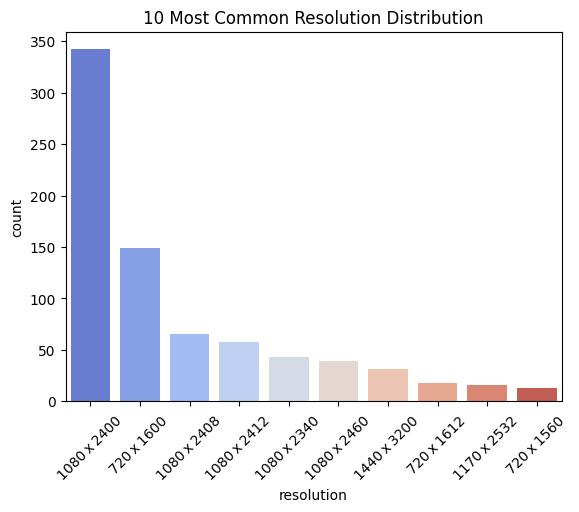

In [23]:
sns.barplot(data=temp_df, x='resolution', y='count', palette = 'coolwarm')
plt.title("10 Most Common Resolution Distribution")
plt.xticks(rotation=45)
plt.show()

#### **processor_core**

<ipython-input-24-89614b4135b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='processor_core', palette='magma', edgecolor='black')


Text(0, 0.5, 'Count')

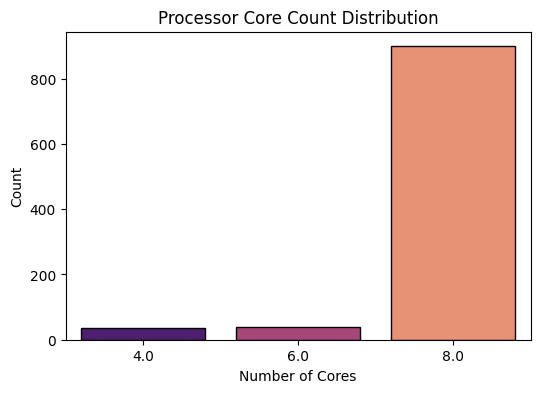

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='processor_core', palette='magma', edgecolor='black')
plt.title("Processor Core Count Distribution")
plt.xlabel("Number of Cores")
plt.ylabel("Count")

### **Numerical Columns - Univariate Analysis**

#### **price**

In [25]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

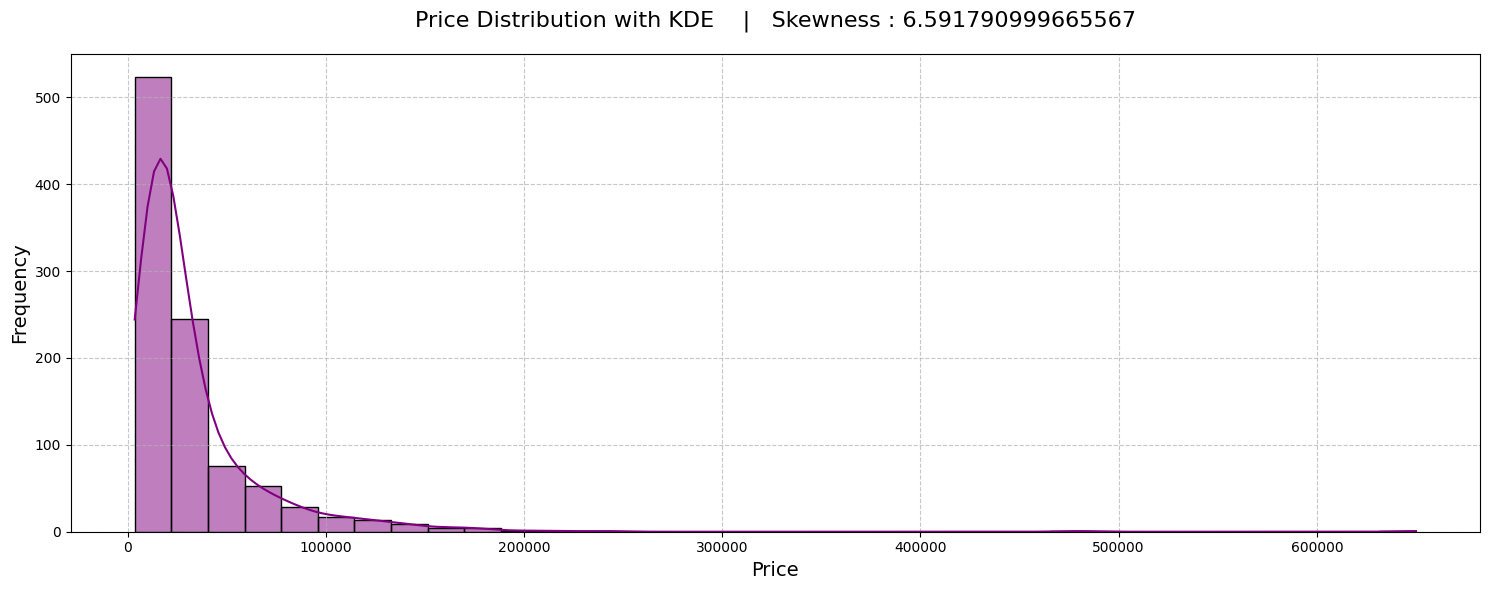

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.histplot(data=df, x='price', kde=True, bins=35, color='purple', edgecolor='black', ax=ax)

skw = df['price'].skew()

ax.set_title(f'Price Distribution with KDE    |   Skewness : {skw}', fontsize=16, pad=20)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

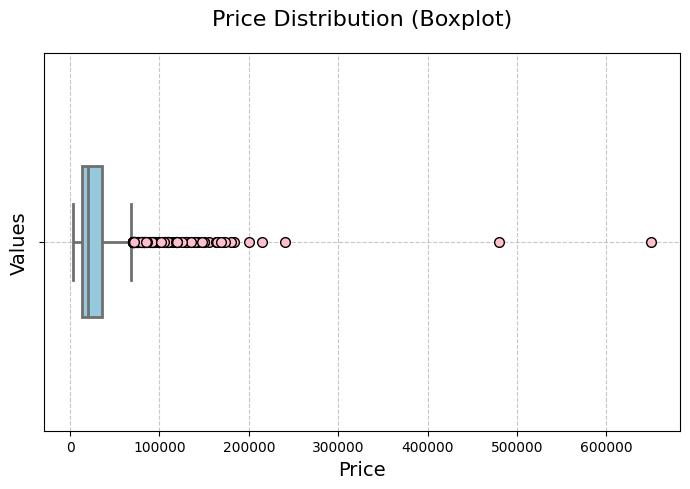

In [27]:
plt.figure(figsize=(7, 5))

sns.boxplot(x=df['price'], color='skyblue', width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=7, markerfacecolor='pink', markeredgecolor='black'))

plt.title('Price Distribution (Boxplot)', fontsize=16, pad=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

In [28]:
df[df['price'] > 250000]

brand_name                                   model     price  rating  \
427      vertu                   Vertu Signature Touch  650000.0    62.0   
887     xiaomi  Xiaomi Redmi K20 Pro Signature Edition  480000.0    88.0   

     has_5g  has_nfc  has_ir_blaster processor_brand  processor_core  \
427   False     True           False      snapdragon             8.0   
887   False     True           False      snapdragon             8.0   

     processor_speed  ram_capacity  base_memory  battery_capacity  \
427              1.5           2.0           64            2275.0   
887              2.8           8.0          256            4000.0   

     fast_charging  fast_charging_available  screen_size    resolution  \
427            NaN                        1         4.70  1080 x 1920    
887           27.0                        1         6.39  1080 x 2340    

     refresh_rate  num_rear_cam  num_front_cam  extended_memory  \
427            60             1              1              NaN   
887            60             3              1              NaN   

     extended_memory_available       os primary_camera_rear  \
427                          0  android                  13   
887                          0  android                  48   

     primary_camera_front  num_cores  
427                   2.1        8.0  
887                  20.0        8.0

In [29]:
df['price'].isnull().sum()

0

In [30]:
# Advanced summary stats
df['price'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
1%         5449.890000
5%         7395.050000
25%       12999.000000
50%       19994.500000
75%       35491.500000
95%       99990.450000
99%      165034.200000
max      650000.000000
Name: price, dtype: float64

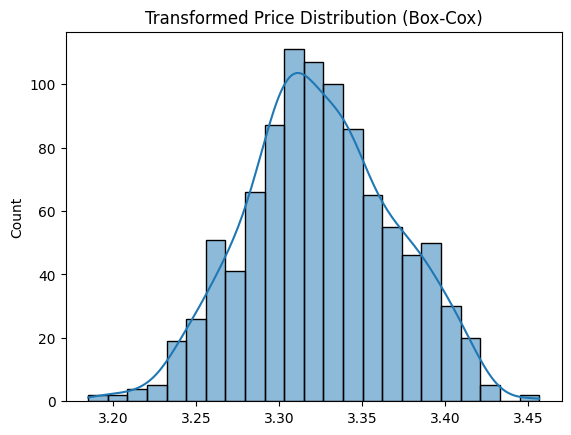

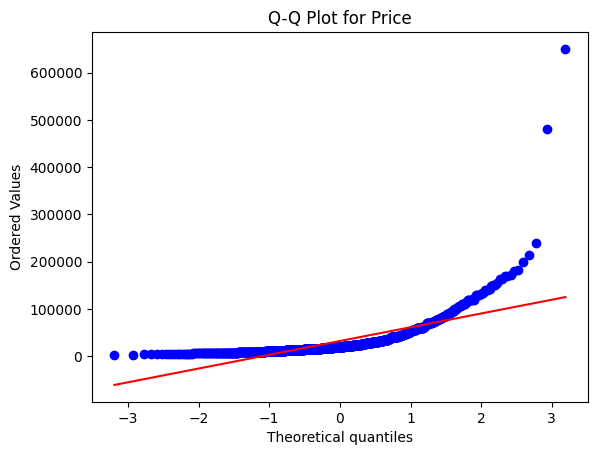

In [31]:
# Box-Cox transformation for skewed data
from scipy.stats import boxcox
price_transformed, _ = boxcox(df['price'].dropna() + 1)  # Handle zeros
sns.histplot(price_transformed, kde=True)
plt.title("Transformed Price Distribution (Box-Cox)")
plt.show()

# Quantile-Quantile Plot
import scipy.stats as stats
stats.probplot(df['price'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for Price")
plt.show()

In [32]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(df[['price']].dropna())
print(f"Outliers detected: {sum(outliers == -1)}")

Outliers detected: 49


#### **rating**

In [33]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

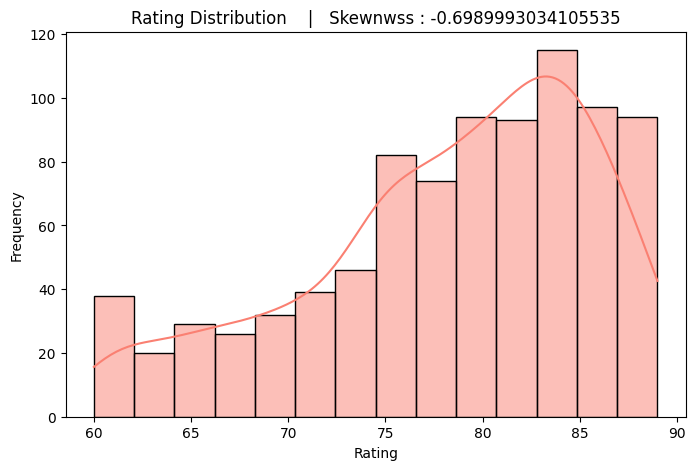

In [34]:
skw = df['rating'].skew()

plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), kde=True, color='salmon', edgecolor='black')
plt.title(f"Rating Distribution    |   Skewnwss : {skw}")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

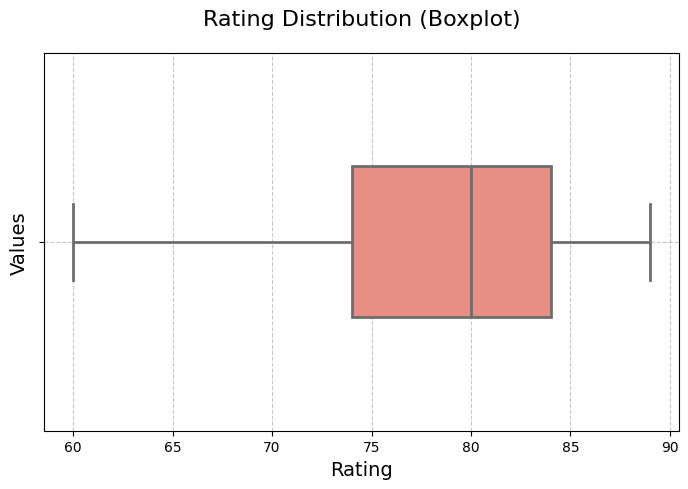

In [35]:
plt.figure(figsize=(7, 5))

sns.boxplot(x=df['rating'], color='salmon', width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=7, markerfacecolor='violet', markeredgecolor='black'))

plt.title('Rating Distribution (Boxplot)', fontsize=16, pad=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

#### **processor_speed**

In [36]:
df['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

<ipython-input-37-fd12d555ee2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


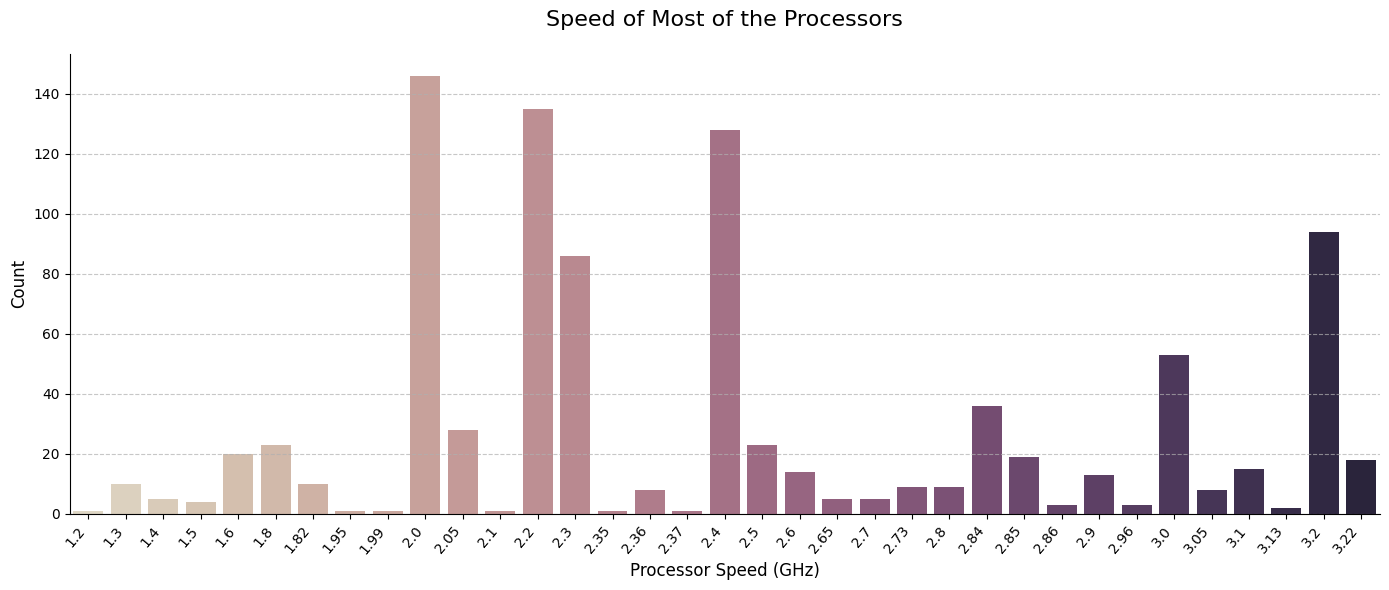

In [37]:
plt.figure(figsize=(14, 6))

processor_speed_counts = df['processor_speed'].value_counts().sort_values(ascending=False)

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Speed of Most of the Processors", fontsize=16, pad=20)
plt.xlabel("Processor Speed (GHz)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **ram_capacity**

In [38]:
df['ram_capacity'].describe()

count    980.000000
mean       6.682653
std        3.774045
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       64.000000
Name: ram_capacity, dtype: float64

<ipython-input-39-d427c7e66901>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['ram_capacity'].value_counts(), palette = 'icefire')


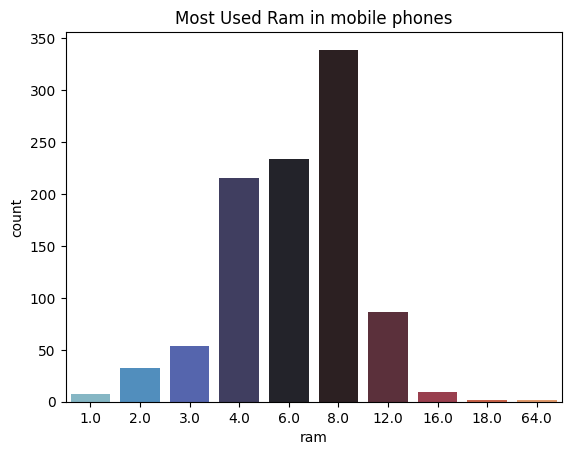

In [39]:
sns.barplot(df['ram_capacity'].value_counts(), palette = 'icefire')

plt.title("Most Used Ram in mobile phones")
plt.xlabel("ram")
plt.ylabel("count")
plt.show()

In [40]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

#### **base_memory**

In [41]:
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
sns.barplot(df['base_memory'].value_counts(), palette = 'cubehelix')

<ipython-input-41-977d805d6b02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['base_memory'].value_counts(), palette = 'cubehelix')


<Axes: xlabel='base_memory', ylabel='count'>

In [42]:
plt.title("Common Base Memory")
sns.kdeplot(df['base_memory'], fill=True, bw_adjust=0.5)

<Axes: title={'center': 'Common Base Memory'}, xlabel='base_memory', ylabel='Density'>

<Axes: ylabel='count'>

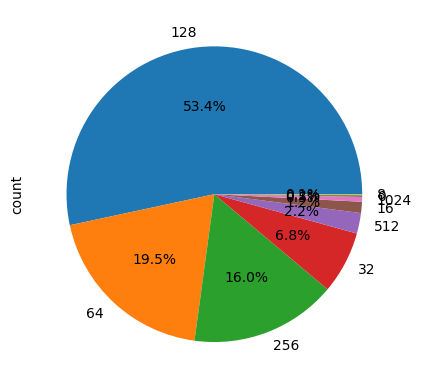

In [43]:
df['base_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

#### **battery_capacity**

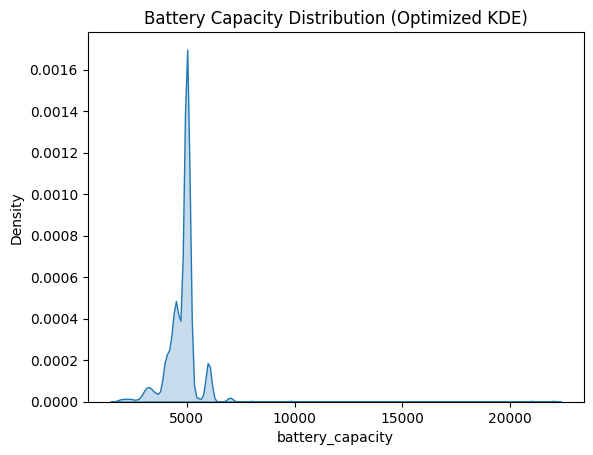

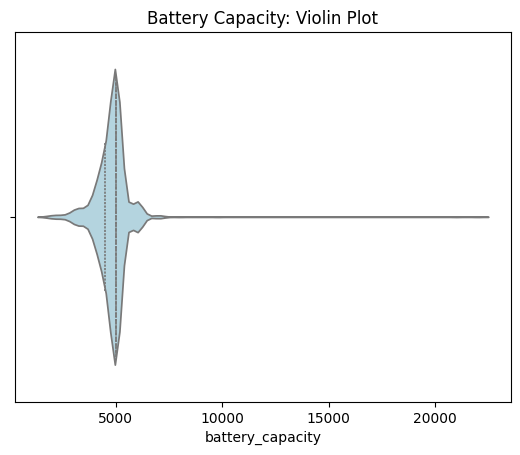

In [44]:
sns.kdeplot(df['battery_capacity'], fill=True, bw_adjust=0.5)
plt.title("Battery Capacity Distribution (Optimized KDE)")
plt.show()

sns.violinplot(x=df['battery_capacity'], inner="quartile", color="lightblue")
plt.title("Battery Capacity: Violin Plot")
plt.show()

#### **fast_charging**

<ipython-input-45-b68a3a939c68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


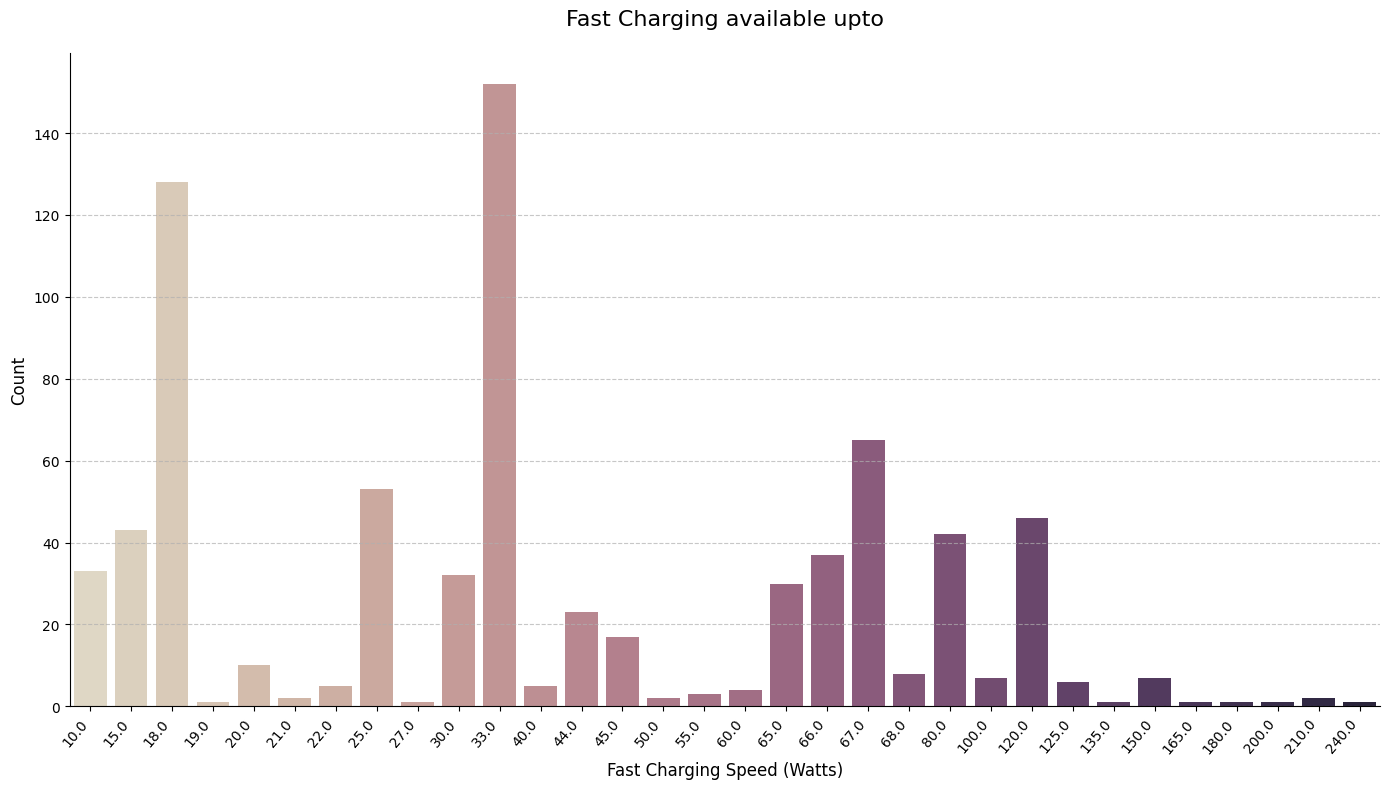

In [45]:
plt.figure(figsize=(14, 8))

processor_speed_counts = df['fast_charging'].value_counts()

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Fast Charging available upto", fontsize=16, pad=20)
plt.xlabel("Fast Charging Speed (Watts)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **screen_size**

<ipython-input-46-363eab3156e7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['screen_size'].value_counts(),


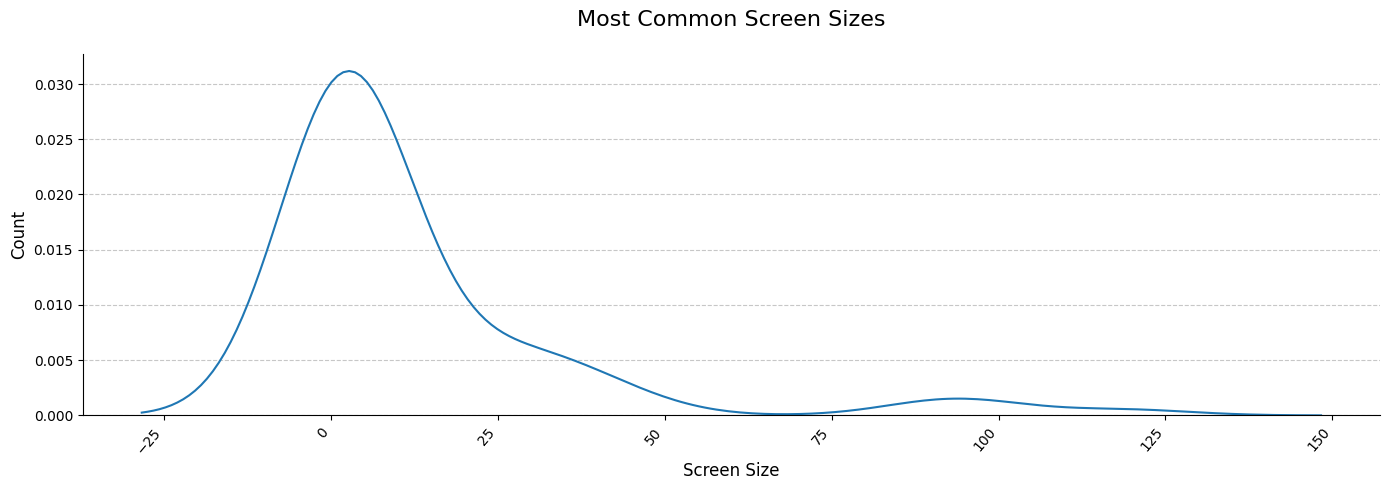

In [46]:
plt.figure(figsize=(14, 5))

sns.kdeplot(df['screen_size'].value_counts(),
            palette='ch:s=-.2,r=.6')

plt.title("Most Common Screen Sizes", fontsize=16, pad=20)
plt.xlabel("Screen Size", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **refresh_rate**

<ipython-input-47-a9b5c277fc85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['refresh_rate'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Most Common Refresh Rates in Devices'}, xlabel='refresh_rate', ylabel='count'>

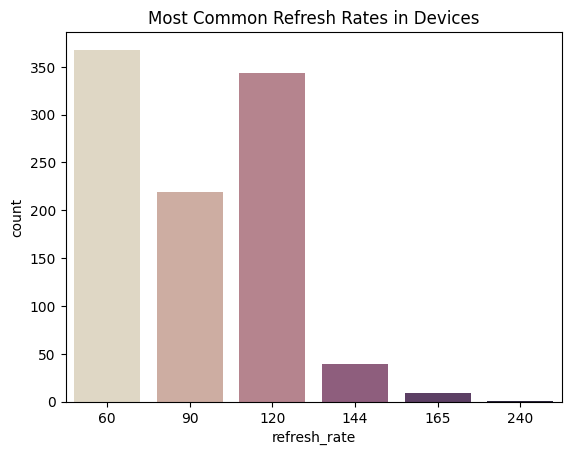

In [47]:
plt.title("Most Common Refresh Rates in Devices")
sns.barplot(df['refresh_rate'].value_counts(), palette='ch:s=-.2,r=.6')

#### **num_rear_cam**

<ipython-input-48-17243c9f8f57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_rear_cam'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Number of Rear Cameras in Most Devices'}, xlabel='Rear Cams', ylabel='count'>

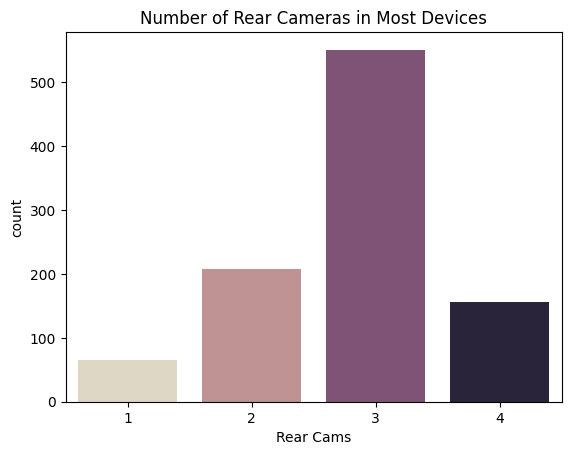

In [48]:
plt.title("Number of Rear Cameras in Most Devices")
plt.xlabel("Rear Cams")
sns.barplot(df['num_rear_cam'].value_counts(), palette='ch:s=-.2,r=.6')

#### **num_front_cam**

<ipython-input-49-fcb6e2569504>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_front_cam'].value_counts(), palette='Blues')


<Axes: title={'center': 'Number of Front Cameras in Most Devices'}, xlabel='Rear Cams', ylabel='count'>

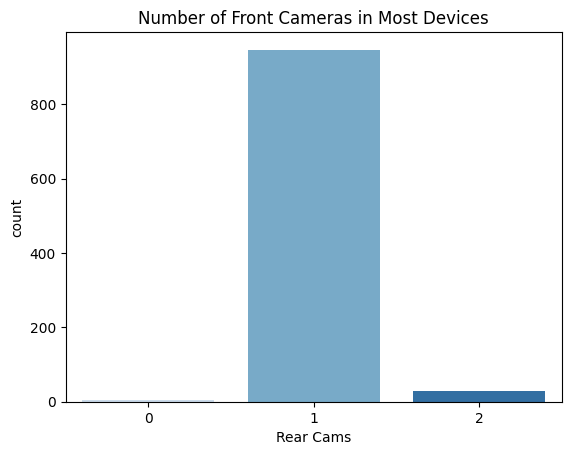

In [49]:
plt.title("Number of Front Cameras in Most Devices")
plt.xlabel("Rear Cams")
sns.barplot(df['num_front_cam'].value_counts(), palette='Blues')

#### **extended_memory**

<ipython-input-50-135efe1f19b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_speed_counts.index,


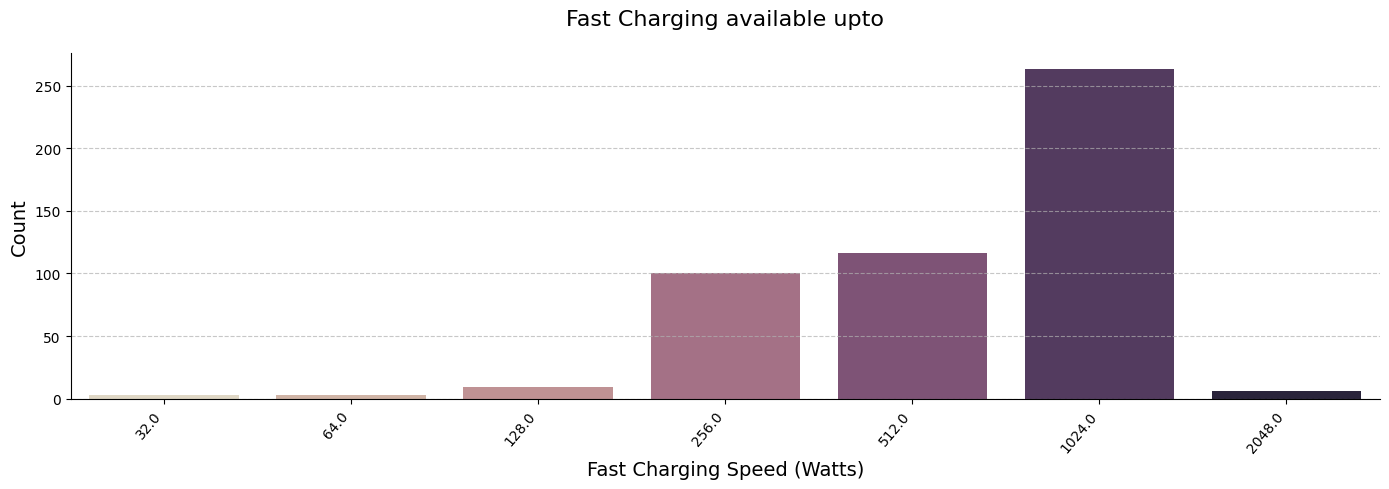

In [50]:
plt.figure(figsize=(14, 5))

processor_speed_counts = df['extended_memory'].value_counts()

sns.barplot(x=processor_speed_counts.index,
            y=processor_speed_counts.values,
            palette='ch:s=-.2,r=.6')

plt.title("Fast Charging available upto", fontsize=16, pad=20)
plt.xlabel("Fast Charging Speed (Watts)", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

#### **primary_camera_rear**

In [51]:
df[df['primary_camera_rear'] == 'Foldable'] = np.nan

<ipython-input-51-68383956d018>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'] == 'Foldable'] = np.nan
<ipython-input-51-68383956d018>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'] == 'Foldable'] = np.nan
<ipython-input-51-68383956d018>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df['primary_camera_rear'] == 'Foldable'] = np.nan


In [52]:
df['primary_camera_rear'] = df['primary_camera_rear'].astype('float')

<Axes: xlabel='primary_camera_rear', ylabel='Density'>

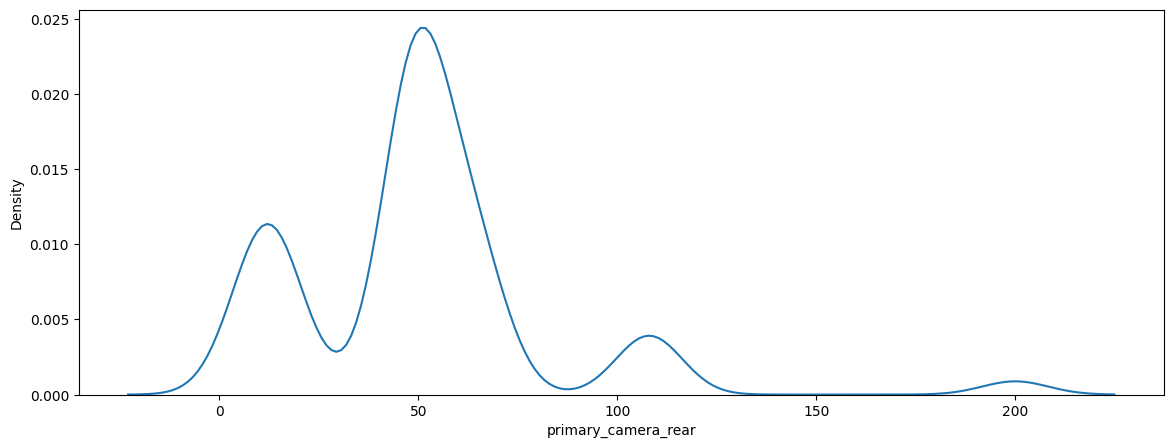

In [53]:
plt.figure(figsize=(14, 5))
sns.kdeplot(data = df, x = 'primary_camera_rear')

#### **primary_camera_front**

<Axes: xlabel='primary_camera_front', ylabel='Density'>

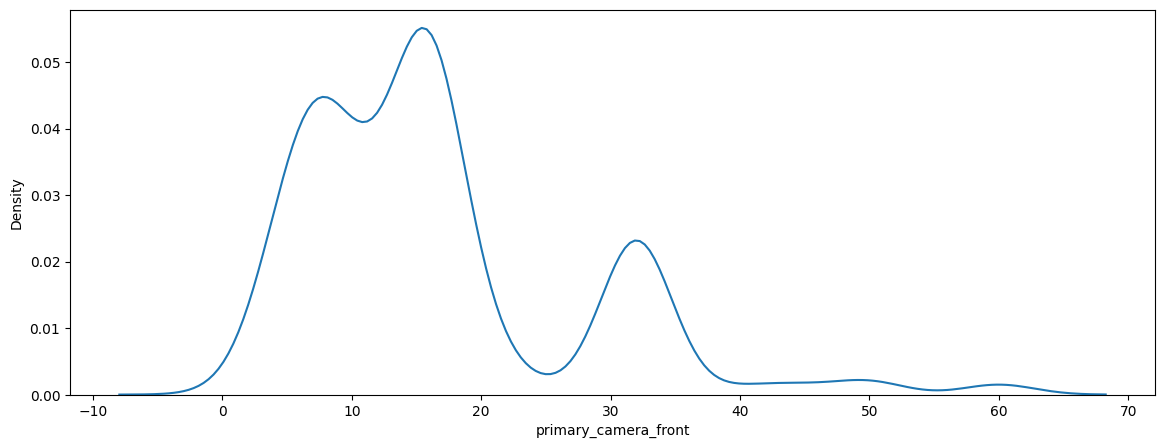

In [54]:
plt.figure(figsize=(14, 5))
sns.kdeplot(data = df, x = 'primary_camera_front')

#### **num_cores**

<ipython-input-55-68b869192cb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['num_cores'].value_counts(), palette='ch:s=-.2,r=.6')


<Axes: title={'center': 'Number of Cores in Most Processors'}, xlabel='Cores', ylabel='count'>

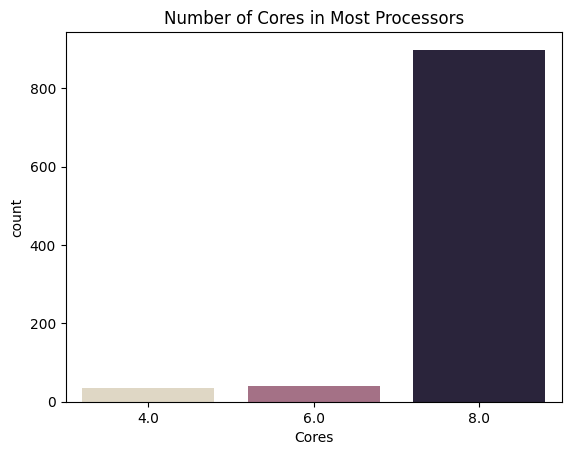

In [55]:
plt.title("Number of Cores in Most Processors")
plt.xlabel("Cores")
sns.barplot(df['num_cores'].value_counts(), palette='ch:s=-.2,r=.6')

### **Boolean Columns - Univariate Analysis**

#### **has_5g**

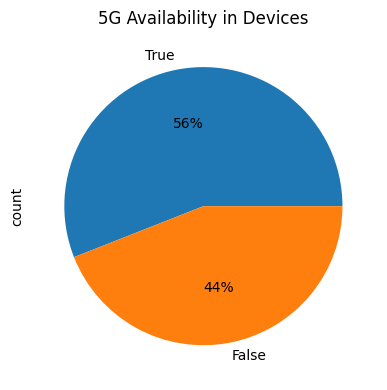

In [56]:
plt.figure(figsize=(4, 4))

df['has_5g'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("5G Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **has_nfc**

In [57]:
plt.figure(figsize=(4, 4))

df['has_nfc'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("NFC Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **has_ir_blaster**

In [58]:
plt.figure(figsize=(4, 4))

df['has_ir_blaster'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("IR Blasters Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **fast_charging_available**

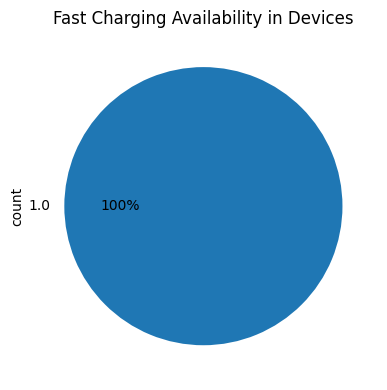

In [59]:
plt.figure(figsize=(4, 4))

df['fast_charging_available'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("Fast Charging Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

#### **extended_memory_available**

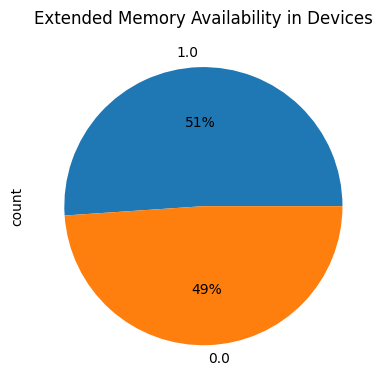

In [60]:
plt.figure(figsize=(4, 4))

df['extended_memory_available'].value_counts().plot(kind='pie', autopct = '%0.f%%')

plt.title("Extended Memory Availability in Devices", fontsize=12)
plt.tight_layout()
plt.show()

## **Bivatiate Analysis**

##### Which Mobile Phone Brand has Most IR Blaster Phones?






In [61]:
tp = df[df['has_ir_blaster'] == True]['brand_name'].value_counts()
sns.barplot(tp, palette='ch:s=-.2,r=.6')
plt.title("Which Mobile Phone Brand has Most IR Blaster Phones?")
plt.xlabel('Brand')

<ipython-input-61-f2f325d191cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tp, palette='ch:s=-.2,r=.6')


Text(0.5, 0, 'Brand')

##### Total Number of Camras in Mobile Phones

<Axes: ylabel='count'>

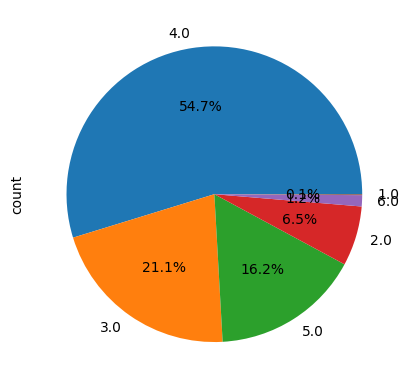

In [62]:
(df['num_rear_cam'] + df['num_front_cam']).value_counts().plot(kind='pie',autopct="%0.1f%%")

##### Price by Phones Brands

In [63]:
import plotly.express as px

brand_price = df.groupby('brand_name')['price'].median().reset_index()

fig = px.bar(brand_price,
             x='brand_name',
             y='price',
             title="Median Price by Brand",
             labels={'price': 'Median Price', 'brand_name': 'Brand Name'},
             text_auto=True,
             color='price',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="Brand Name",
    yaxis_title="Median Price",
    xaxis_tickangle=-45,
    template='plotly_white',
    hovermode='x unified',
    coloraxis_showscale=False
)

fig.show()

##### Brand That has Atleast 10 Different Modles

In [64]:
x = df.groupby('brand_name').size()

In [65]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

<ipython-input-66-965b8ea683a2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[]

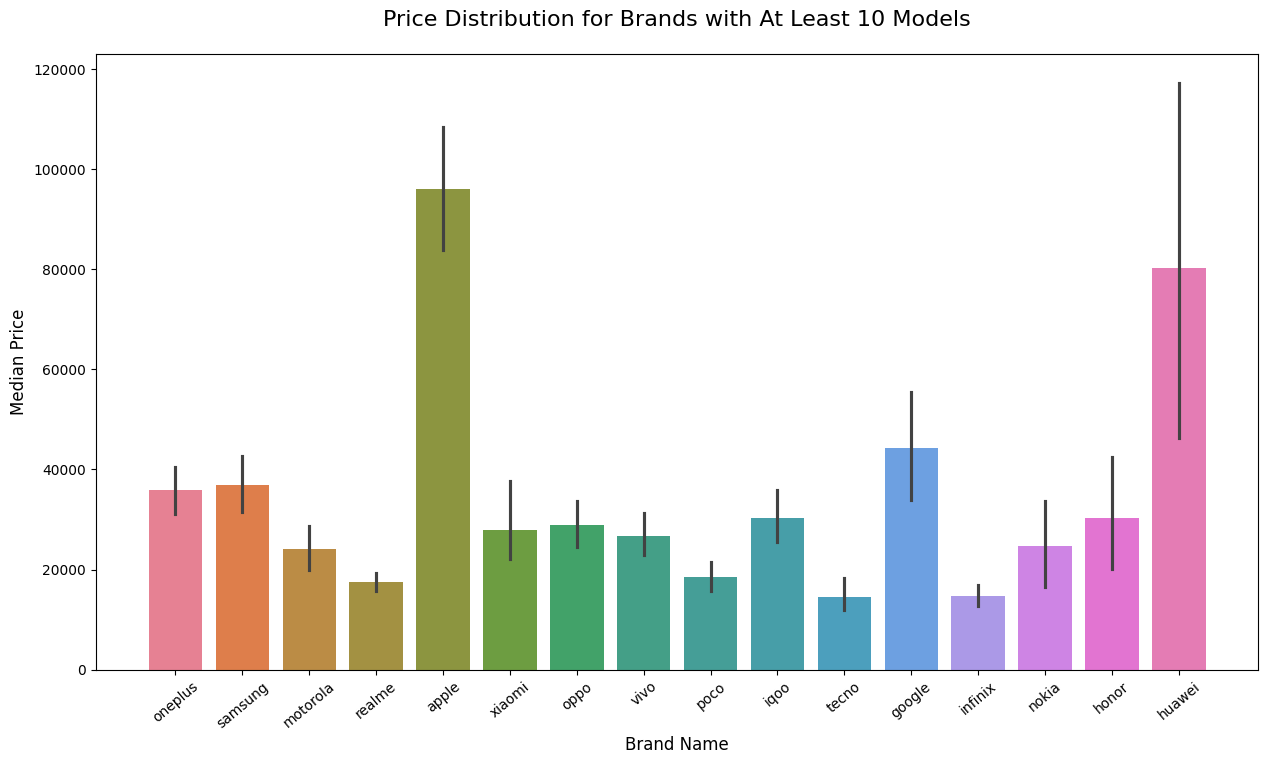

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price', palette='husl')

plt.title("Price Distribution for Brands with At Least 10 Models", fontsize=16, pad=20)
plt.xlabel("Brand Name", fontsize=12)
plt.ylabel("Median Price", fontsize=12)

plt.xticks(rotation=40)
plt.plot()

##### Is there is any correlation between price and rating

In [67]:
import plotly.express as px

fig = px.scatter(df, x='price', y='rating',
                 title="Price vs Rating",
                 labels={'rating': 'Rating', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

In [68]:
df[['price', 'rating']].corr()

price    rating
price   1.000000  0.283504
rating  0.283504  1.000000


###### **Insight**:

> This plot indicates the week positive correlation between the price and the rating. It mainly means that the price is not a strong predictor of rating and there is no visible trend.

> It mainly telling us that the most rated phones are in the 0 to 100000 range and all the phones are rated between the range of 60 to 90.



###### **Conclusion:**

> Cheaper phones still provide the higher level of satisfaction which intern lead to higher ratings for those phones.



---






##### Price Difference if we have ( 5g, nfc, ir blaster )

In [69]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_5g', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<ipython-input-69-2f4e23032740>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_5g', ylabel='price'>

<ipython-input-70-e22b34e9812f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_ir_blaster', ylabel='price'>

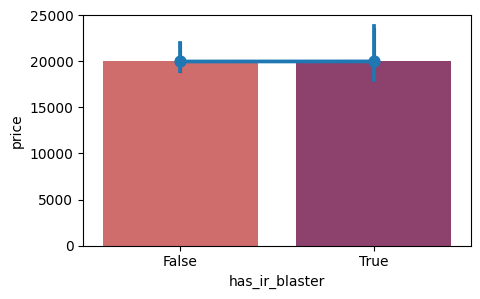

In [70]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_ir_blaster', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

In [71]:
plt.figure( figsize = (5, 3))
sns.barplot(data = df, y = 'price', x = 'has_nfc', estimator=np.median, palette = 'flare')

sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

<ipython-input-71-84f9f0ec74c8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='has_nfc', ylabel='price'>

##### Price difference between the Prcessor Brands

<ipython-input-72-e8d0b090c5e3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='processor_brand', ylabel='price'>

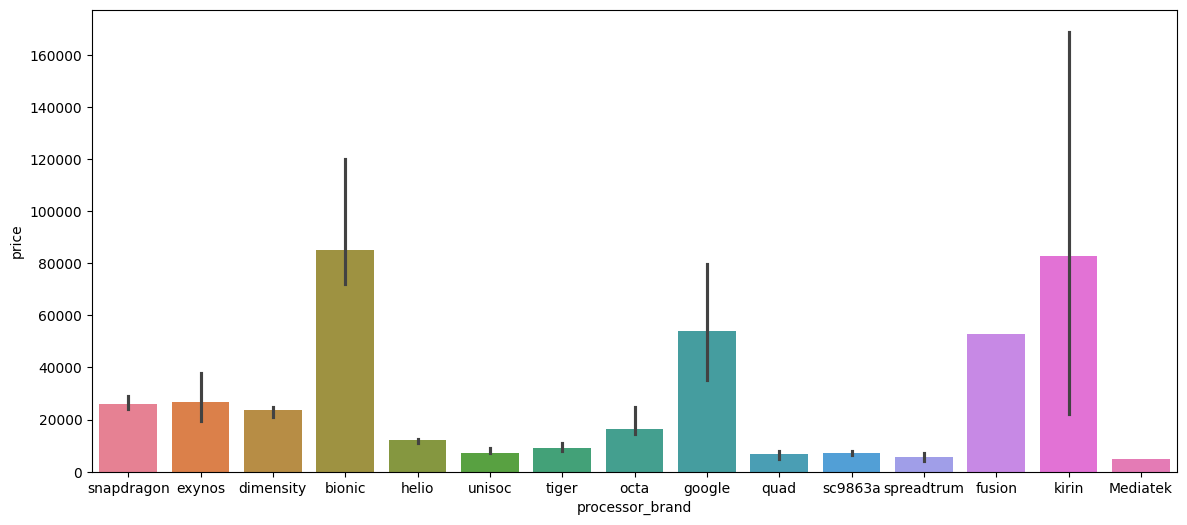

In [72]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df, x = 'processor_brand', y = 'price', palette = 'husl', estimator=np.median)

##### Is there is any correlation between the processor speed and processor brand?

In [73]:
plt.figure( figsize = (14, 6))
plt.xticks(rotation=30)
sns.scatterplot(data = df, y = 'processor_speed', x = 'processor_brand')

<Axes: xlabel='processor_brand', ylabel='processor_speed'>

##### Is there is any price difference if we have different cores?

<ipython-input-74-5dec2eb8cb23>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='num_cores', ylabel='price'>

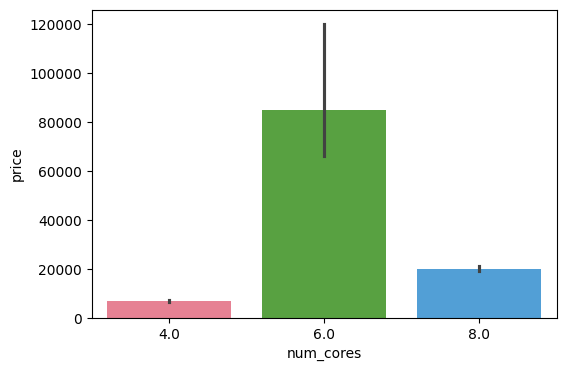

In [74]:
plt.figure(figsize = (6, 4))
sns.barplot(data = df, x = 'num_cores', y = 'price', palette = 'husl', estimator=np.median)

##### The most used cores in different os

In [75]:
pd.crosstab(df['num_cores'], df['os'])

os         android  ios  other
num_cores                     
4.0             33    1      2
6.0              0   39      0
8.0            875    1     22

##### Is there a correlation between the price and processor_speed?

In [76]:
import plotly.express as px

fig = px.scatter(df, x='processor_speed', y='price',
                 title="Processor Speed vs Price",
                 labels={'processor_speed': 'Processor Speed (GHz)', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

##### Is there a correlation between the price and screen_size?

In [77]:
import plotly.express as px

fig = px.scatter(df, x='screen_size', y='price',
                 title="Screen Size vs Price",
                 labels={'processor_speed': 'Processor Speed (GHz)', 'price': 'Price (USD)'},
                 color_continuous_scale='husl')

fig.show()

##### What is the correlation between rating and other columns?

In [78]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()['rating']

price                        0.283504
rating                       1.000000
processor_core               0.199741
processor_speed              0.628446
ram_capacity                 0.542422
base_memory                  0.482552
battery_capacity            -0.015581
fast_charging                0.527613
fast_charging_available           NaN
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cam                 0.515531
num_front_cam                0.131480
extended_memory              0.346761
extended_memory_available   -0.343502
primary_camera_rear          0.565831
primary_camera_front         0.579465
num_cores                    0.199741
Name: rating, dtype: float64

##### What is the correlation between price and other columns?

In [79]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()['price']

price                        1.000000
rating                       0.283504
processor_core              -0.049122
processor_speed              0.472361
ram_capacity                 0.292385
base_memory                  0.555314
battery_capacity            -0.159804
fast_charging                0.276786
fast_charging_available           NaN
screen_size                  0.110750
refresh_rate                 0.242920
num_rear_cam                 0.127422
num_front_cam                0.066334
extended_memory              0.091945
extended_memory_available   -0.356815
primary_camera_rear          0.100680
primary_camera_front         0.177243
num_cores                   -0.049122
Name: price, dtype: float64

##### Correlation between the processor_brand and resolution

In [91]:
contingency_table = pd.crosstab(df['processor_brand'], df['resolution'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d')

plt.xlabel('Resolution')
plt.ylabel('Processor Brand')
plt.title('Processor Brand vs Resolution')

plt.show()

## **Multivariate Analysis**

In [92]:
df.head()

brand_name                      model    price  rating has_5g has_nfc  \
0    oneplus              OnePlus 11 5G  54999.0    89.0   True    True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989.0    81.0   True   False   
2    samsung      Samsung Galaxy A14 5G  16499.0    75.0   True   False   
3   motorola       Motorola Moto G62 5G  14999.0    81.0   True   False   
4     realme         Realme 10 Pro Plus  24999.0    82.0   True   False   

  has_ir_blaster processor_brand  processor_core  processor_speed  \
0          False      snapdragon             8.0              3.2   
1          False      snapdragon             8.0              2.2   
2          False          exynos             8.0              2.4   
3          False      snapdragon             8.0              2.2   
4          False       dimensity             8.0              2.6   

   ram_capacity  base_memory  battery_capacity  fast_charging  \
0          12.0        256.0            5000.0          100.0   
1           6.0        128.0            5000.0           33.0   
2           4.0         64.0            5000.0           15.0   
3           6.0        128.0            5000.0            NaN   
4           6.0        128.0            5000.0           67.0   

   fast_charging_available  screen_size    resolution  refresh_rate  \
0                      1.0         6.70  1440 x 3216          120.0   
1                      1.0         6.59  1080 x 2412          120.0   
2                      1.0         6.60  1080 x 2408           90.0   
3                      1.0         6.55  1080 x 2400          120.0   
4                      1.0         6.70  1080 x 2412          120.0   

   num_rear_cam  num_front_cam  extended_memory  extended_memory_available  \
0           3.0            1.0              NaN                        0.0   
1           3.0            1.0           1024.0                        1.0   
2           3.0            1.0           1024.0                        1.0   
3           3.0            1.0           1024.0                        1.0   
4           3.0            1.0              NaN                        0.0   

        os  primary_camera_rear  primary_camera_front  num_cores  
0  android                 50.0                  16.0        8.0  
1  android                 64.0                  16.0        8.0  
2  android                 50.0                  13.0        8.0  
3  android                 50.0                  16.0        8.0  
4  android                108.0                  16.0        8.0

##### A pair plot shows scatter plots between numerical variables and helps identify correlations, clusters, and patterns.

In [93]:
sns.pairplot(df[['price', 'rating', 'processor_speed', 'ram_capacity', 'battery_capacity']], diag_kind='kde')
plt.show()

##### How strongly numerical features are related to each other

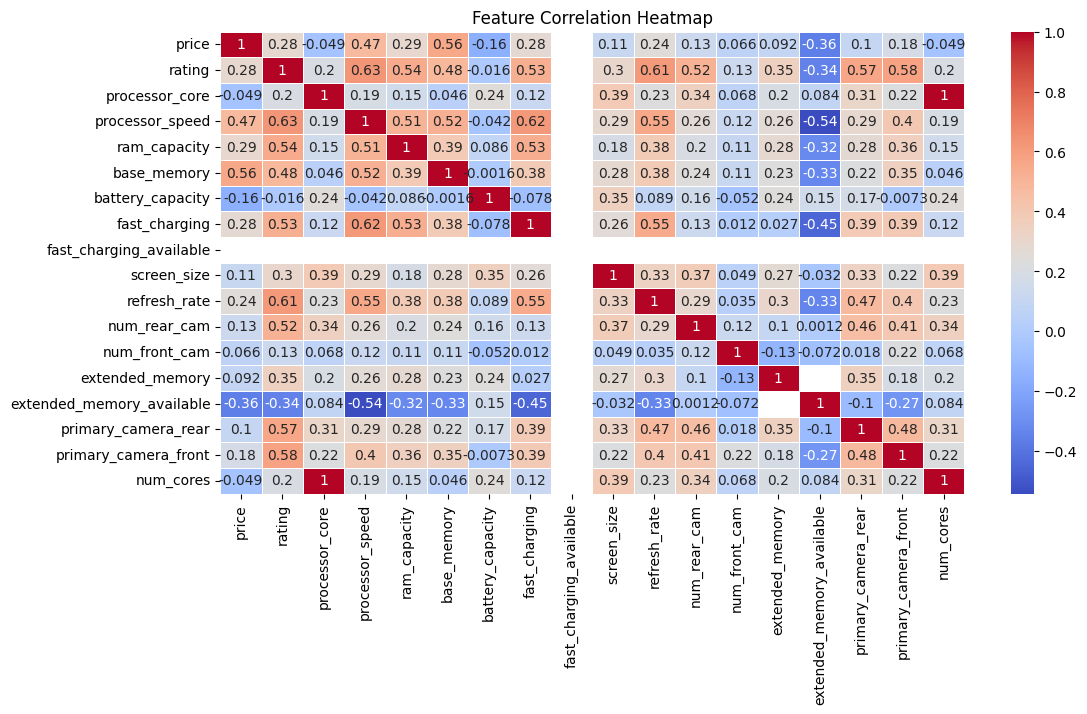

In [94]:
plt.figure(figsize=(12, 6))
df_365 = df.select_dtypes(include=['number'])
sns.heatmap(df_365.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### Comparing brands based on multiple specs

In [95]:
fig = px.bar(df,
             x='brand_name',
             y=['ram_capacity', 'battery_capacity', 'price'],
             barmode='group',
             title="Brand-wise Comparison",
             labels={'value': 'Specs', 'brand_name': 'Brand'},
             color_discrete_map={'ram_capacity': 'yellow', 'battery_capacity': 'black', 'price': 'purple'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

##### 3D Scatter Plot (Price, RAM, and Rating)

In [96]:
fig = px.scatter_3d(df, x='price', y='ram_capacity', z='rating', color='brand_name',
                     title="3D Scatter Plot: Price vs RAM vs Rating")
fig.show()

##### RAM size impacts price

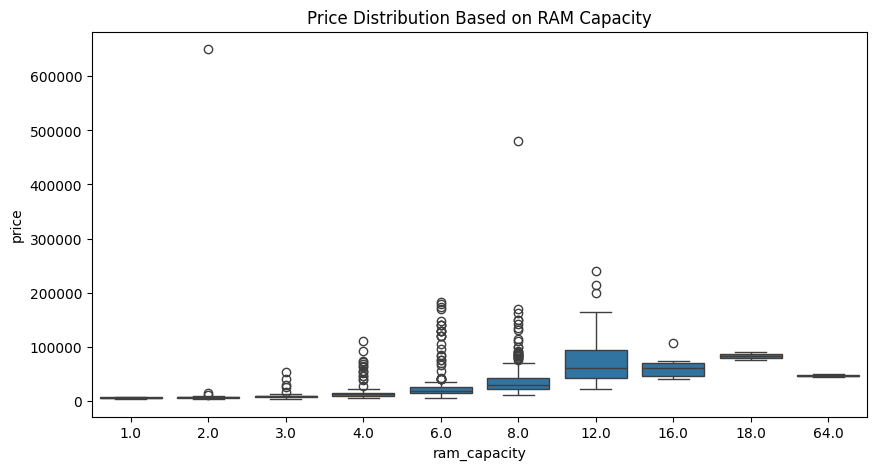

In [97]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ram_capacity', y='price')
plt.title("Price Distribution Based on RAM Capacity")
plt.show()

##### Compares multiple features at once for selected models

In [100]:
import plotly.graph_objects as go
selected_models = df[df['model'].isin(['OnePlus 11 5G', 'Samsung Galaxy A14 5G', 'Realme 10 Pro Plus'])]

fig = go.Figure()
for _, row in selected_models.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row['price'], row['rating'], row['ram_capacity'], row['battery_capacity']],
        theta=['Price', 'Rating', 'RAM', 'Battery'],
        fill='toself',
        name=row['model']
    ))

fig.update_layout(title="Feature Comparison of Selected Models", polar=dict(radialaxis=dict(visible=True)))
fig.show()

##### Bubble Chart (Price vs. Rating, Bubble Size = Battery Capacity)

In [101]:
df['battery_capacity'] = df['battery_capacity'].astype(float)
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].mean())

In [102]:
fig = px.scatter(df,
                 x='price',
                 y='rating',
                 size='battery_capacity',
                 color='brand_name',
                 title="Price vs Rating (Bubble Size = Battery Capacity)",
                 hover_data=['model', 'processor_brand'])

fig.show()

##### Sunburst Chart (Brand → Processor → RAM Distribution)

In [103]:
df['brand_name'] = df['brand_name'].fillna('Unknown')
df['processor_brand'] = df['processor_brand'].fillna('Unknown')
df['ram_capacity'] = df['ram_capacity'].fillna('Unknown')

In [104]:
fig = px.sunburst(df,
                  path=['brand_name', 'processor_brand', 'ram_capacity'],
                  values='price',
                  title="Brand-Processor-RAM Hierarchy")

fig.show()

##### Heatmap (Correlation Between Features [ 'price', 'rating', 'ram_capacity', 'battery_capacity', 'processor_speed' ])

In [105]:
from sklearn.impute import KNNImputer

df['ram_capacity'] = pd.to_numeric(df['ram_capacity'], errors='coerce')


imputer = KNNImputer(n_neighbors=5)
df['ram_capacity'] = imputer.fit_transform(df[['ram_capacity']])

In [106]:
corr_matrix = df[['price', 'rating', 'ram_capacity', 'battery_capacity', 'processor_speed']].corr().round(2)

# Convert to heatmap
fig = ff.create_annotated_heatmap(
    z=np.array(corr_matrix),
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='blues',
    showscale=True
)

fig.update_layout(title="Feature Correlation Heatmap")
fig.show()

## **The correlation of price with other columns that will help in predicting the price.**

In [107]:
find_df = df.select_dtypes(include=['number']).drop(columns = 'price')

In [109]:
find_df.sample(6)

rating  processor_core  processor_speed  ram_capacity  base_memory  \
656    83.0             8.0             3.20           8.0        128.0   
535    84.0             8.0             2.40           8.0        128.0   
742    76.0             8.0             2.20           4.0         64.0   
43     85.0             8.0             2.60           8.0        256.0   
25     88.0             8.0             2.84           8.0        128.0   
511    86.0             8.0             2.60           8.0        256.0   

     battery_capacity  fast_charging  fast_charging_available  screen_size  \
656            4520.0           33.0                      1.0         6.67   
535            4000.0           66.0                      1.0         6.78   
742            5000.0           33.0                      1.0         6.60   
43             5000.0           67.0                      1.0         6.70   
25             4500.0            NaN                      1.0         6.50   
511            4300.0          210.0                      1.0         6.67   

     refresh_rate  num_rear_cam  num_front_cam  extended_memory  \
656         120.0           3.0            1.0              NaN   
535          90.0           4.0            1.0              NaN   
742          90.0           3.0            1.0              NaN   
43          120.0           3.0            1.0              NaN   
25          120.0           3.0            1.0              NaN   
511         120.0           3.0            1.0              NaN   

     extended_memory_available  primary_camera_rear  primary_camera_front  \
656                        0.0                 48.0                  20.0   
535                        0.0                108.0                  16.0   
742                        0.0                 50.0                  16.0   
43                         0.0                108.0                  16.0   
25                         0.0                 12.0                  32.0   
511                        0.0                200.0                  16.0   

     num_cores  
656        8.0  
535        8.0  
742        8.0  
43         8.0  
25         8.0  
511        8.0

In [110]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
final_df = imputer.fit_transform(find_df)

find_df = pd.DataFrame(final_df,columns=find_df.columns)

find_df['price'] = df['price']

In [111]:
find_df.sample(6)

rating  processor_core  processor_speed  ram_capacity  base_memory  \
174    79.0             8.0             2.00           6.0        128.0   
117    78.0             8.0             2.40           6.0        128.0   
67     87.0             8.0             2.60          12.0        256.0   
173    61.0             6.0             2.65           3.0         64.0   
8      85.0             8.0             2.50           8.0        128.0   
169    63.2             4.0             2.00           4.0         32.0   

     battery_capacity  fast_charging  fast_charging_available  screen_size  \
174            5000.0           18.0                      1.0         6.58   
117            4700.0           66.0                      1.0         6.44   
67             4980.0          120.0                      1.0         6.67   
173            2050.0           15.2                      1.0         4.70   
8              4500.0           33.0                      1.0         6.55   
169            4000.0           13.6                      1.0         6.54   

     refresh_rate  num_rear_cam  num_front_cam  extended_memory  \
174         120.0           2.0            1.0           1024.0   
117          90.0           3.0            1.0           1024.0   
67          120.0           3.0            1.0           1228.8   
173          60.0           1.0            1.0            166.4   
8           120.0           2.0            1.0            768.0   
169          60.0           2.0            1.0            262.4   

     extended_memory_available  primary_camera_rear  primary_camera_front  \
174                        1.0                 50.0                   8.0   
117                        0.0                 64.0                  16.0   
67                         0.0                200.0                  16.0   
173                        0.0                 12.0                   7.0   
8                          0.0                 50.0                  16.0   
169                        0.0                  8.0                   5.0   

     num_cores    price  
174        8.0  15499.0  
117        8.0  21788.0  
67         8.0  32999.0  
173        6.0  29990.0  
8          8.0  26749.0  
169        4.0   5499.0

In [112]:
a = find_df.corr()['price'].reset_index()

In [114]:
dfn = df.select_dtypes(include=['number'])

In [115]:
b = dfn.corr()['price'].reset_index()

In [116]:
b.merge(a,on='index')

index   price_x   price_y
0                       price  1.000000  1.000000
1                      rating  0.283504  0.345392
2              processor_core -0.049122 -0.053932
3             processor_speed  0.472361  0.485296
4                ram_capacity  0.292385  0.292385
5                 base_memory  0.555314  0.555314
6            battery_capacity -0.158089 -0.158089
7               fast_charging  0.276786  0.235522
8     fast_charging_available       NaN       NaN
9                 screen_size  0.110750  0.110750
10               refresh_rate  0.242920  0.242920
11               num_rear_cam  0.127422  0.127422
12              num_front_cam  0.066334  0.066334
13            extended_memory  0.091945  0.007308
14  extended_memory_available -0.356815 -0.356815
15        primary_camera_rear  0.100680  0.100680
16       primary_camera_front  0.177243  0.166752
17                  num_cores -0.049122 -0.053932

In [117]:
'''

In above case we are comparing the predicted value of price and the existing value of the price

'''

' \n\nIn above case we are comparing the predicted value of price and the existing value of the price\n\n'

In [120]:
df.head()

brand_name                      model    price  rating has_5g has_nfc  \
0    oneplus              OnePlus 11 5G  54999.0    89.0   True    True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989.0    81.0   True   False   
2    samsung      Samsung Galaxy A14 5G  16499.0    75.0   True   False   
3   motorola       Motorola Moto G62 5G  14999.0    81.0   True   False   
4     realme         Realme 10 Pro Plus  24999.0    82.0   True   False   

  has_ir_blaster processor_brand  processor_core  processor_speed  \
0          False      snapdragon             8.0              3.2   
1          False      snapdragon             8.0              2.2   
2          False          exynos             8.0              2.4   
3          False      snapdragon             8.0              2.2   
4          False       dimensity             8.0              2.6   

   ram_capacity  base_memory  battery_capacity  fast_charging  \
0          12.0        256.0            5000.0          100.0   
1           6.0        128.0            5000.0           33.0   
2           4.0         64.0            5000.0           15.0   
3           6.0        128.0            5000.0            NaN   
4           6.0        128.0            5000.0           67.0   

   fast_charging_available  screen_size    resolution  refresh_rate  \
0                      1.0         6.70  1440 x 3216          120.0   
1                      1.0         6.59  1080 x 2412          120.0   
2                      1.0         6.60  1080 x 2408           90.0   
3                      1.0         6.55  1080 x 2400          120.0   
4                      1.0         6.70  1080 x 2412          120.0   

   num_rear_cam  num_front_cam  extended_memory  extended_memory_available  \
0           3.0            1.0              NaN                        0.0   
1           3.0            1.0           1024.0                        1.0   
2           3.0            1.0           1024.0                        1.0   
3           3.0            1.0           1024.0                        1.0   
4           3.0            1.0              NaN                        0.0   

        os  primary_camera_rear  primary_camera_front  num_cores  
0  android                 50.0                  16.0        8.0  
1  android                 64.0                  16.0        8.0  
2  android                 50.0                  13.0        8.0  
3  android                 50.0                  16.0        8.0  
4  android                108.0                  16.0        8.0

In [ ]:
df.to_csv('smartphone_cleaned_v8_final_version.csv', index = False)

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
